In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

# Cargar el archivo CSV exportado
df = pd.read_csv('flights.csv')

# Mostrar las primeras filas para revisar la estructura
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216497 entries, 0 to 216496
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Searched Date          216497 non-null  object
 1   Departure Date         216497 non-null  object
 2   Arrival Date           216497 non-null  object
 3   Flight Lands Next Day  216497 non-null  int64 
 4   Departure Airport      216497 non-null  object
 5   Arrival Airport        216497 non-null  object
 6   Number Of Stops        216497 non-null  int64 
 7   Route                  190198 non-null  object
 8   Airline                216497 non-null  object
 9   Cabin                  216497 non-null  object
 10  Price                  216496 non-null  object
dtypes: int64(2), object(9)
memory usage: 18.2+ MB
None


In [ ]:
df.head()

Searched Date       Departure Date         Arrival Date  \
0    2024-06-30  2024-07-16 23:48:00  2024-07-17 15:03:00   
1    2024-06-30  2024-07-16 09:34:00  2024-07-16 19:43:00   
2    2024-06-30  2024-07-16 23:48:00  2024-07-17 15:03:00   
3    2024-06-30  2024-07-16 08:30:00  2024-07-16 19:37:00   
4    2024-06-30  2024-07-16 07:00:00  2024-07-16 16:36:00   

   Flight Lands Next Day Departure Airport Arrival Airport  Number Of Stops  \
0                      1               LAS             BOS                1   
1                      0               LAS             BOS                1   
2                      1               LAS             BOS                1   
3                      0               LAS             BOS                1   
4                      0               LAS             BOS                1   

  Route            Airline          Cabin Price  
0   ATL    Spirit Airlines        Economy   $83  
1   EWR    Spirit Airlines        Economy  $100  
2   ATL    Spirit Airlines        Economy   $78  
3   IAH    Spirit Airlines        Economy  $100  
4   ORD  American Airlines  Basic Economy  $148

In [ ]:
# Reemplazar NaN en la columna Route por "DIR"
df['Route'].fillna('DIR', inplace=True)

# Mostrar los primeros registros para verificar
df.head()


Searched Date       Departure Date         Arrival Date  \
0    2024-06-30  2024-07-16 23:48:00  2024-07-17 15:03:00   
1    2024-06-30  2024-07-16 09:34:00  2024-07-16 19:43:00   
2    2024-06-30  2024-07-16 23:48:00  2024-07-17 15:03:00   
3    2024-06-30  2024-07-16 08:30:00  2024-07-16 19:37:00   
4    2024-06-30  2024-07-16 07:00:00  2024-07-16 16:36:00   

   Flight Lands Next Day Departure Airport Arrival Airport  Number Of Stops  \
0                      1               LAS             BOS                1   
1                      0               LAS             BOS                1   
2                      1               LAS             BOS                1   
3                      0               LAS             BOS                1   
4                      0               LAS             BOS                1   

  Route            Airline          Cabin Price  
0   ATL    Spirit Airlines        Economy   $83  
1   EWR    Spirit Airlines        Economy  $100  
2   ATL    Spirit Airlines        Economy   $78  
3   IAH    Spirit Airlines        Economy  $100  
4   ORD  American Airlines  Basic Economy  $148

In [ ]:
# Eliminar símbolo $ y convertir a tipo float
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)

# Verificar los primeros registros
print(df['Price'].head())


0     83.0
1    100.0
2     78.0
3    100.0
4    148.0
Name: Price, dtype: float64


In [ ]:
# Convertir las columnas de fechas a tipo datetime
df['Departure Date'] = pd.to_datetime(df['Departure Date'], errors='coerce')
df['Searched Date'] = pd.to_datetime(df['Searched Date'], errors='coerce')

# Calcular la columna 'Days Until Departure'
df['Days to Departure'] = (df['Departure Date'] - df['Searched Date']).dt.days

# Verificar las primeras filas para confirmar que se creó correctamente
print(df[['Departure Date', 'Searched Date', 'Days to Departure']].head())

       Departure Date Searched Date  Days to Departure
0 2024-07-16 23:48:00    2024-06-30                 16
1 2024-07-16 09:34:00    2024-06-30                 16
2 2024-07-16 23:48:00    2024-06-30                 16
3 2024-07-16 08:30:00    2024-06-30                 16
4 2024-07-16 07:00:00    2024-06-30                 16


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216497 entries, 0 to 216496
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Searched Date          216497 non-null  datetime64[ns]
 1   Departure Date         216497 non-null  datetime64[ns]
 2   Arrival Date           216497 non-null  object        
 3   Flight Lands Next Day  216497 non-null  int64         
 4   Departure Airport      216497 non-null  object        
 5   Arrival Airport        216497 non-null  object        
 6   Number Of Stops        216497 non-null  int64         
 7   Route                  216497 non-null  object        
 8   Airline                216497 non-null  object        
 9   Cabin                  216497 non-null  object        
 10  Price                  216496 non-null  float64       
 11  Days to Departure      216497 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(3), 

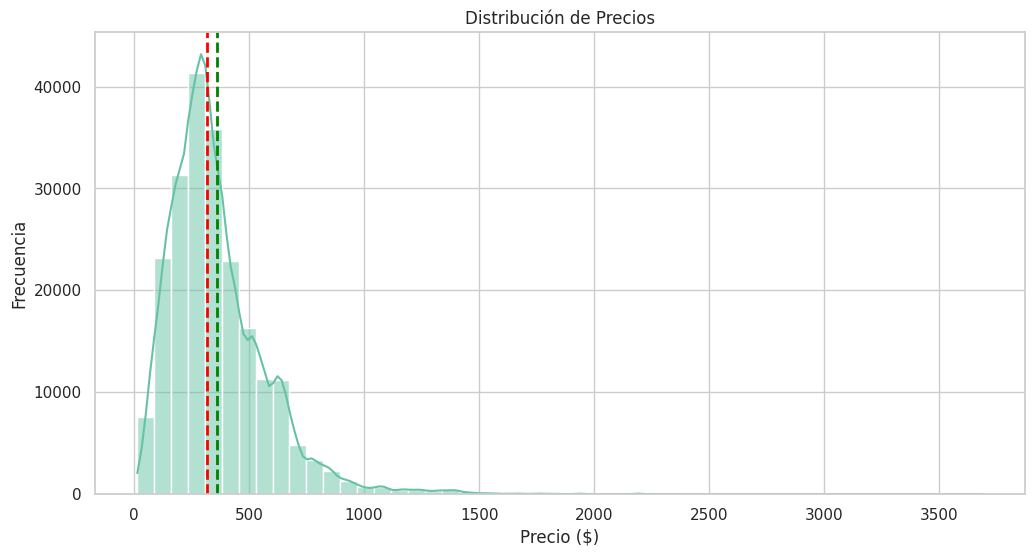

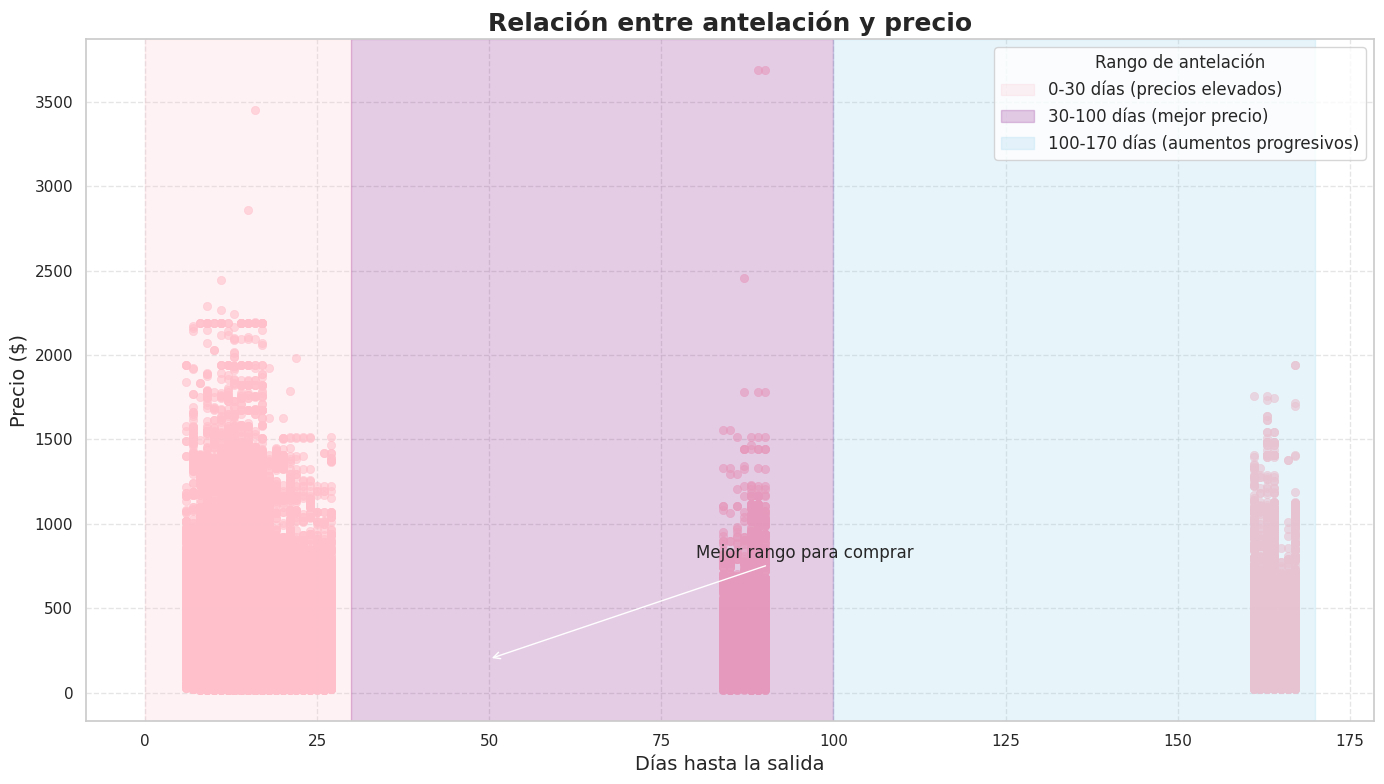

<ipython-input-9-406d18f3542e>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Number Of Stops', y='Price', data=df, palette=colors)
<ipython-input-9-406d18f3542e>:41: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.boxplot(x='Number Of Stops', y='Price', data=df, palette=colors)


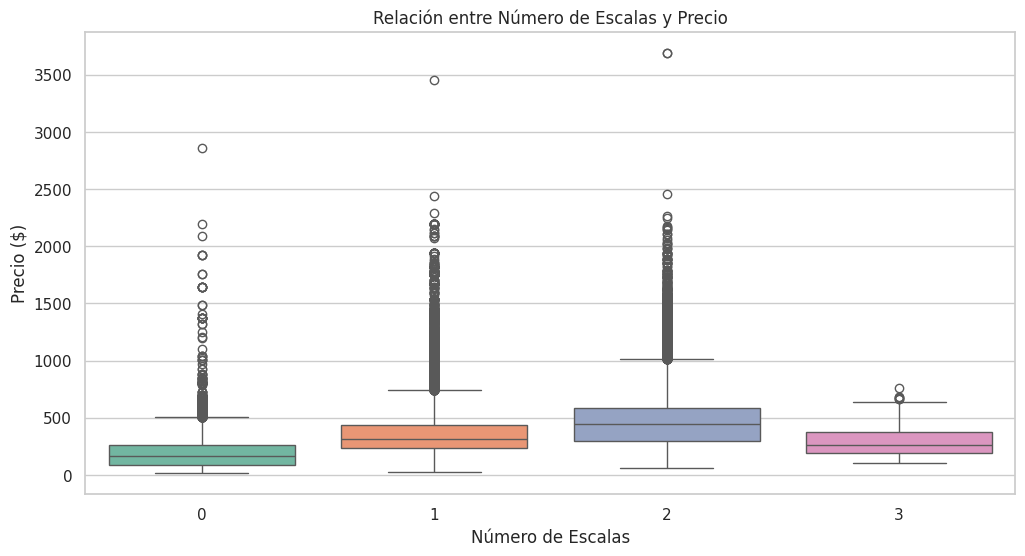

<ipython-input-9-406d18f3542e>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Airline', y='Price', data=df, palette="Paired")


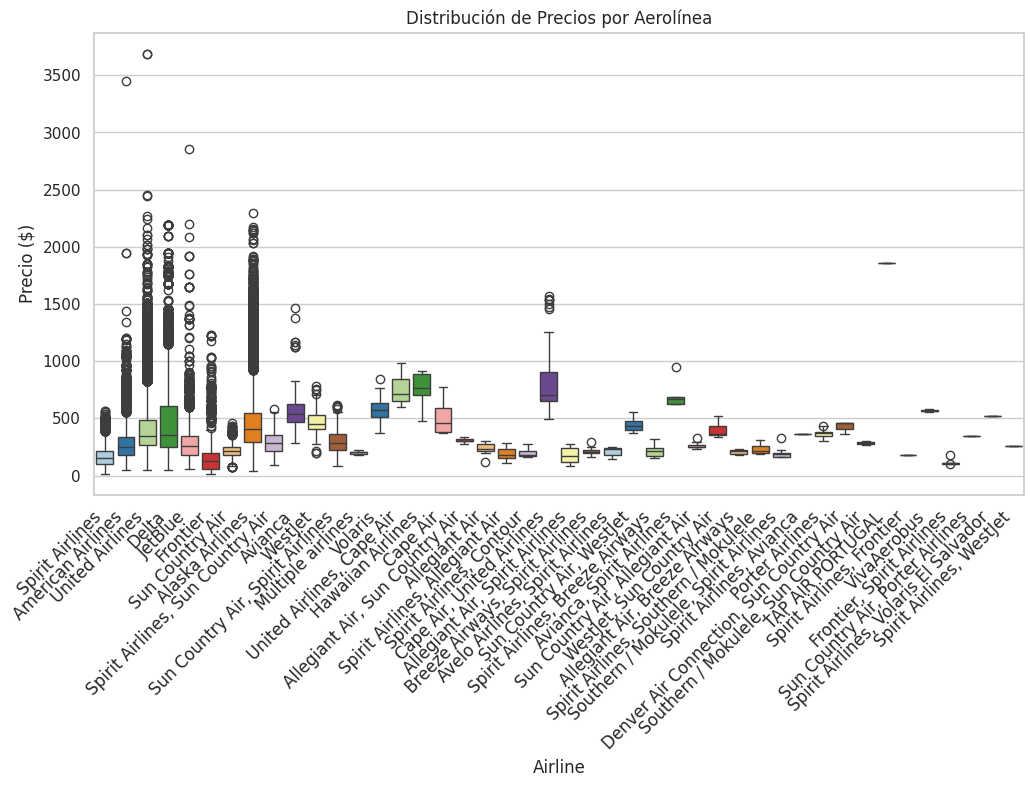

<ipython-input-9-406d18f3542e>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Departure Day', y='Price', data=df, palette="coolwarm")


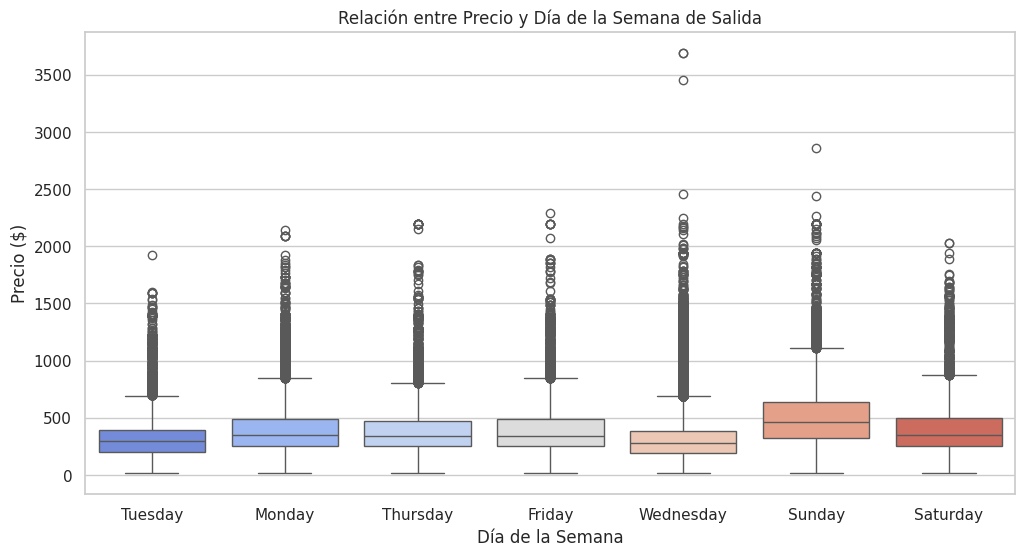

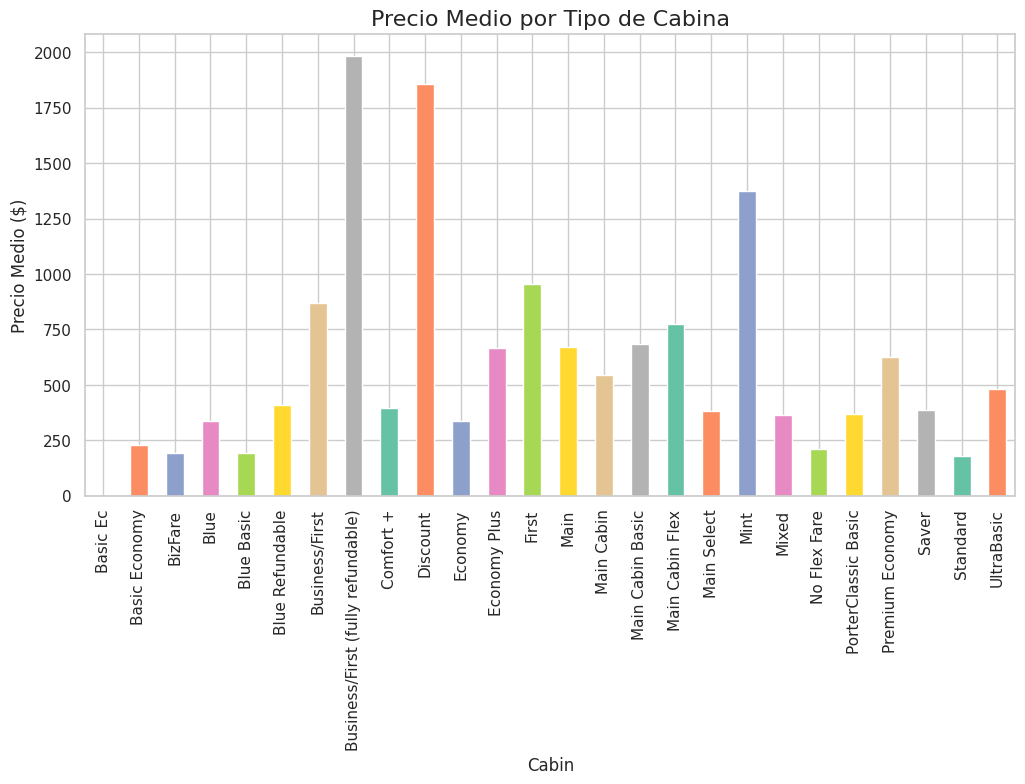

<ipython-input-9-406d18f3542e>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Cabin', y='Price', palette='muted', inner='quartile')


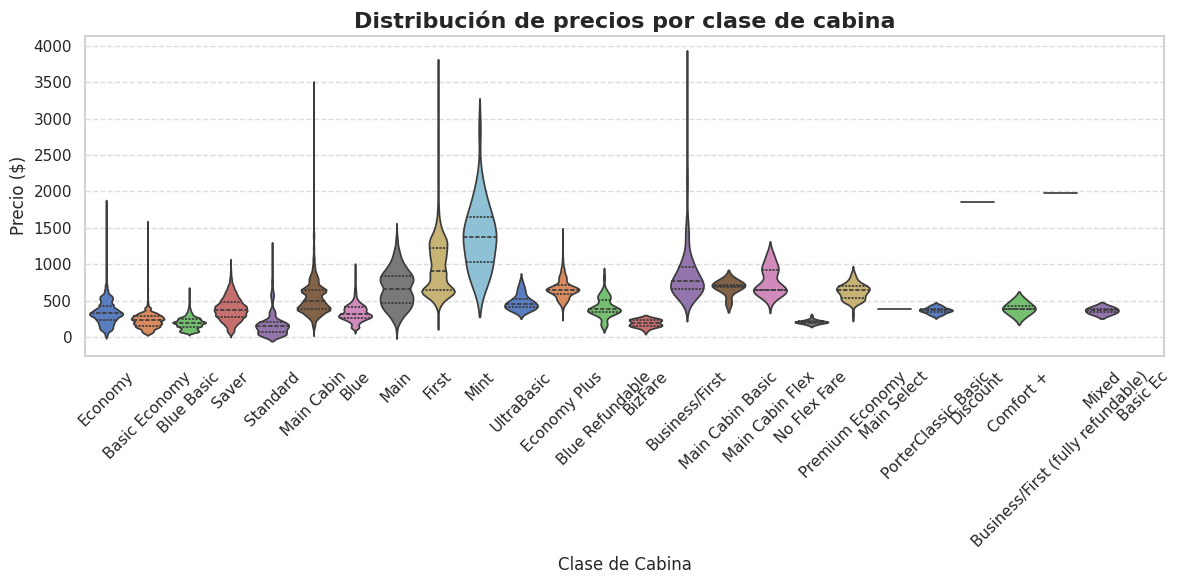

<ipython-input-9-406d18f3542e>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Departure Airport', y='Price', data=df, palette='Set1')


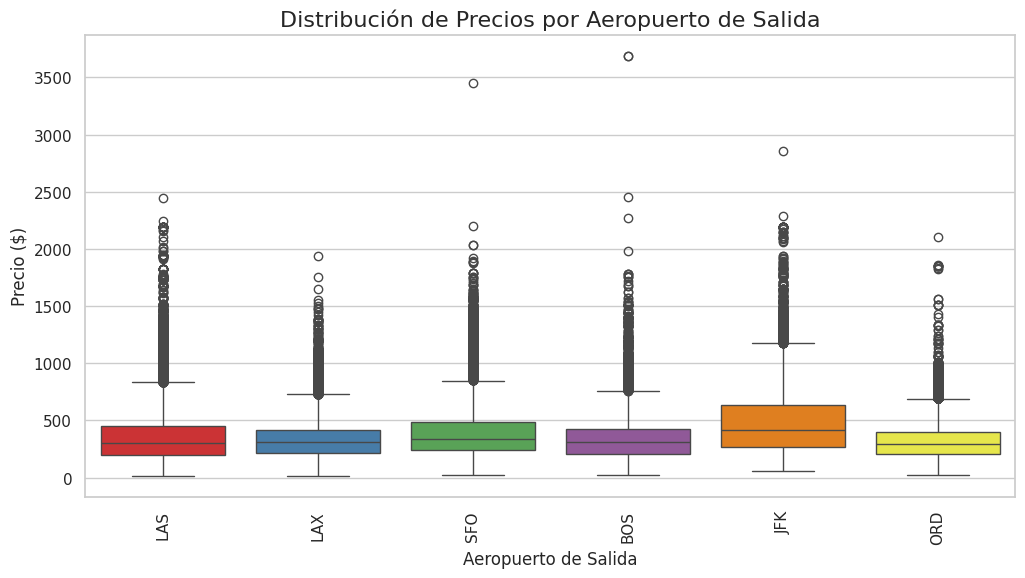

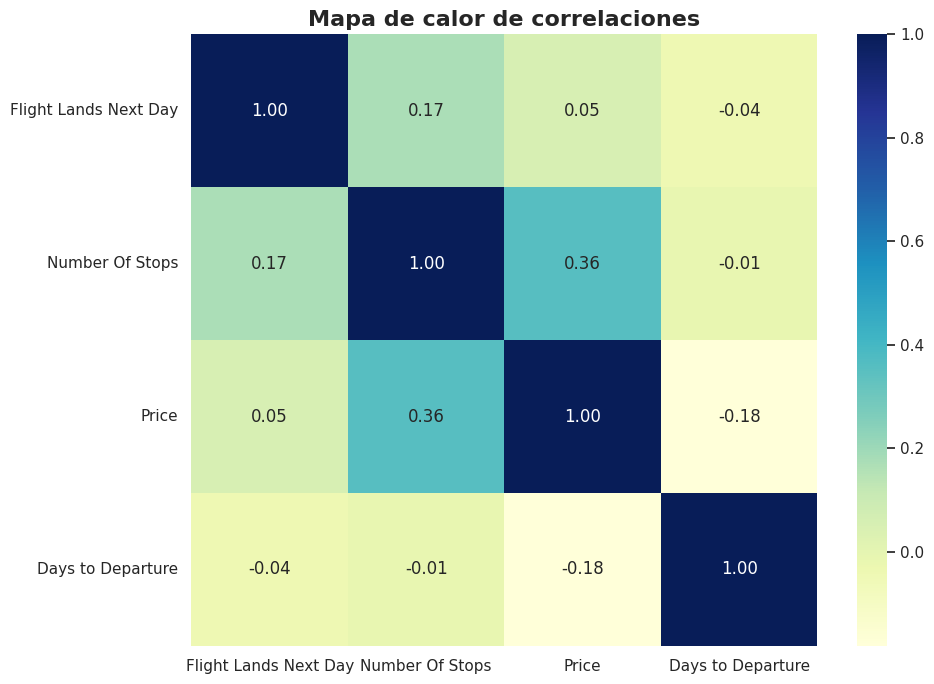

In [ ]:
# Configuración de estilo
sns.set_theme(style="whitegrid", palette="muted")


# Paleta de colores personalizada
colors = sns.color_palette("Set2")

# 1. Distribución de precios
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], bins=50, kde=True, color=colors[0])
plt.title('Distribución de Precios')
plt.xlabel('Precio ($)')
plt.ylabel('Frecuencia')
plt.axvline(df['Price'].median(), color='red', linestyle='--', linewidth=2, label='Mediana')
plt.axvline(df['Price'].mean(), color='green', linestyle='--', linewidth=2, label='Media')
plt.show()

# 2. Relación entre días hasta la salida y precio
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='Days to Departure', y='Price', alpha=0.6, color='pink', edgecolor=None)

# Añadir franjas
plt.axvspan(0, 30, color='pink', alpha=0.2, label='0-30 días (precios elevados)')
plt.axvspan(30, 100, color='purple', alpha=0.2, label='30-100 días (mejor precio)')
plt.axvspan(100, 170, color='skyblue', alpha=0.2, label='100-170 días (aumentos progresivos)')

# Resaltar valores extremos
plt.annotate('Mejor rango para comprar', xy=(50, 200), xytext=(80, 800),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)

plt.title('Relación entre antelación y precio', fontsize=18, fontweight='bold')
plt.xlabel('Días hasta la salida', fontsize=14)
plt.ylabel('Precio ($)', fontsize=14)
plt.legend(title='Rango de antelación', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 3. Número de escalas vs.Precio
plt.figure(figsize=(12, 6))
sns.boxplot(x='Number Of Stops', y='Price', data=df, palette=colors)
plt.title('Relación entre Número de Escalas y Precio')
plt.xlabel('Número de Escalas')
plt.ylabel('Precio ($)')
plt.show()

# 4. Aerolínea vs. Precio
plt.figure(figsize=(12, 6))
sns.boxplot(x='Airline', y='Price', data=df, palette="Paired")
plt.xticks(rotation=45)
plt.title('Distribución de Precios por Aerolínea')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Precio ($)')
plt.show()


# 5. Dia de la semana vs. Precio
df['Departure Day'] = df['Departure Date'].dt.day_name()
plt.figure(figsize=(12, 6))
sns.boxplot(x='Departure Day', y='Price', data=df, palette="coolwarm")
plt.title('Relación entre Precio y Día de la Semana de Salida')
plt.xlabel('Día de la Semana')
plt.ylabel('Precio ($)')
plt.show()

# 6. Tipo de cabina vs. Precio
plt.figure(figsize=(12, 6))
df.groupby('Cabin')['Price'].mean().plot(kind='bar', color=colors)
plt.title('Precio Medio por Tipo de Cabina', fontsize=16)
plt.ylabel('Precio Medio ($)', fontsize=12)
plt.show()

#Distribución de precios por clase de cabina
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Cabin', y='Price', palette='muted', inner='quartile')
plt.title('Distribución de precios por clase de cabina', fontsize=16, fontweight='bold')
plt.xlabel('Clase de Cabina', fontsize=12)
plt.ylabel('Precio ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 7. Aeropuerto de salida vs. Precio
plt.figure(figsize=(12, 6))
sns.boxplot(x='Departure Airport', y='Price', data=df, palette='Set1')
plt.title('Distribución de Precios por Aeropuerto de Salida', fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Aeropuerto de Salida', fontsize=12)
plt.ylabel('Precio ($)', fontsize=12)
plt.show()

# 8. Gráfico de correlaciones
#Mapa de calor
# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

# Generar el mapa de calor con una nueva paleta
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Mapa de calor de correlaciones", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


In [ ]:
# Crear una columna que identifique vuelos específicos
df['VueloID'] = (df['Departure Date'].astype(str) + '_' +
                 df['Arrival Date'].astype(str) + '_' +
                 df['Departure Airport'] + '_' +
                 df['Arrival Airport'] + '_' +
                 df['Number Of Stops'].astype(str) + '_' +
                 df['Route'] + '_' +
                 df['Airline'])

<ipython-input-11-cf2826c312cd>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=vuelos_top_df, x='Days to Departure', y='Price', hue='VueloID', marker='o', palette='tab10', linewidth=2, ci=None)


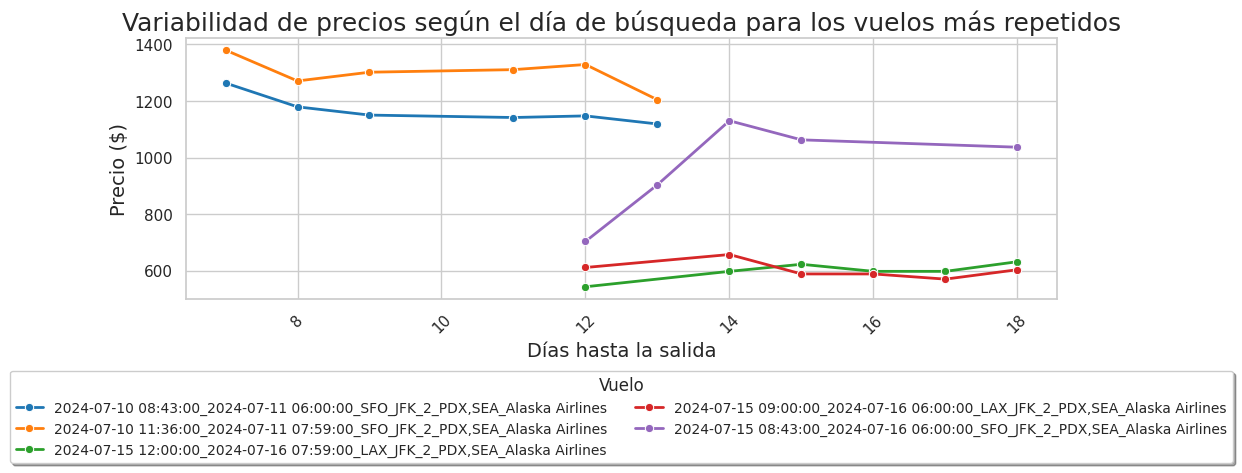

In [ ]:
# Obtener los cinco VueloID que más se repiten
top_vuelos = df['VueloID'].value_counts().head(5).index.tolist()

# Filtrar el DataFrame para que solo contenga los vuelos más repetidos
vuelos_top_df = df[df['VueloID'].isin(top_vuelos)]

# Graficar la variabilidad de precios para los vuelos más repetidos
plt.figure(figsize=(12, 6))
sns.lineplot(data=vuelos_top_df, x='Days to Departure', y='Price', hue='VueloID', marker='o', palette='tab10', linewidth=2, ci=None)

plt.title('Variabilidad de precios según el día de búsqueda para los vuelos más repetidos', fontsize=18)
plt.xlabel('Días hasta la salida', fontsize=14)
plt.ylabel('Precio ($)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)

# Colocar la leyenda mucho más abajo del gráfico
plt.legend(title='Vuelo', loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=2, fontsize=10, title_fontsize=12, frameon=True, fancybox=True, shadow=True)
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Espacio extra debajo para la leyenda
plt.show()


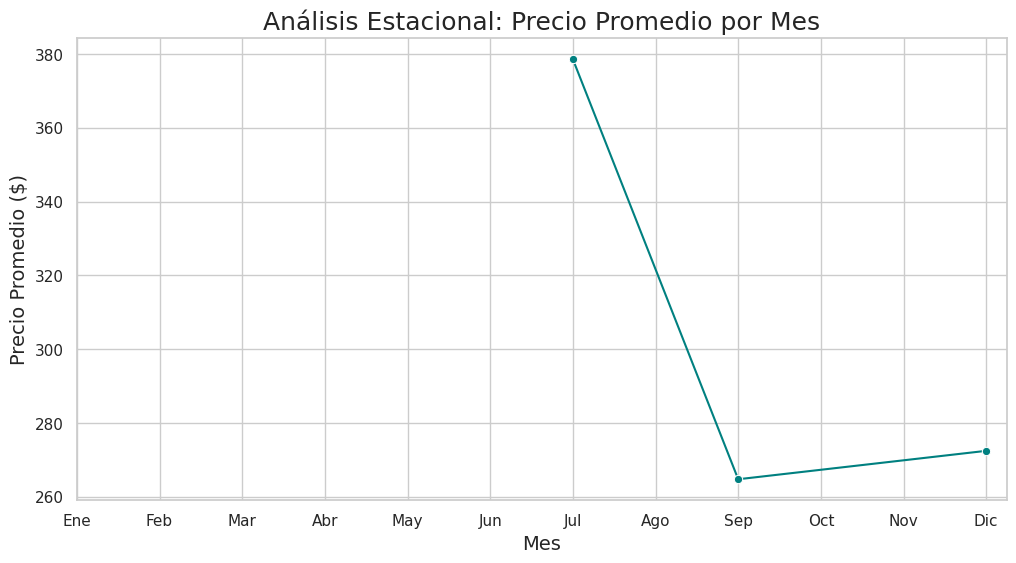

/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
<ipython-input-12-f074196dc6c6>:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Categoría Duración', loc='upper right', fontsize=10)


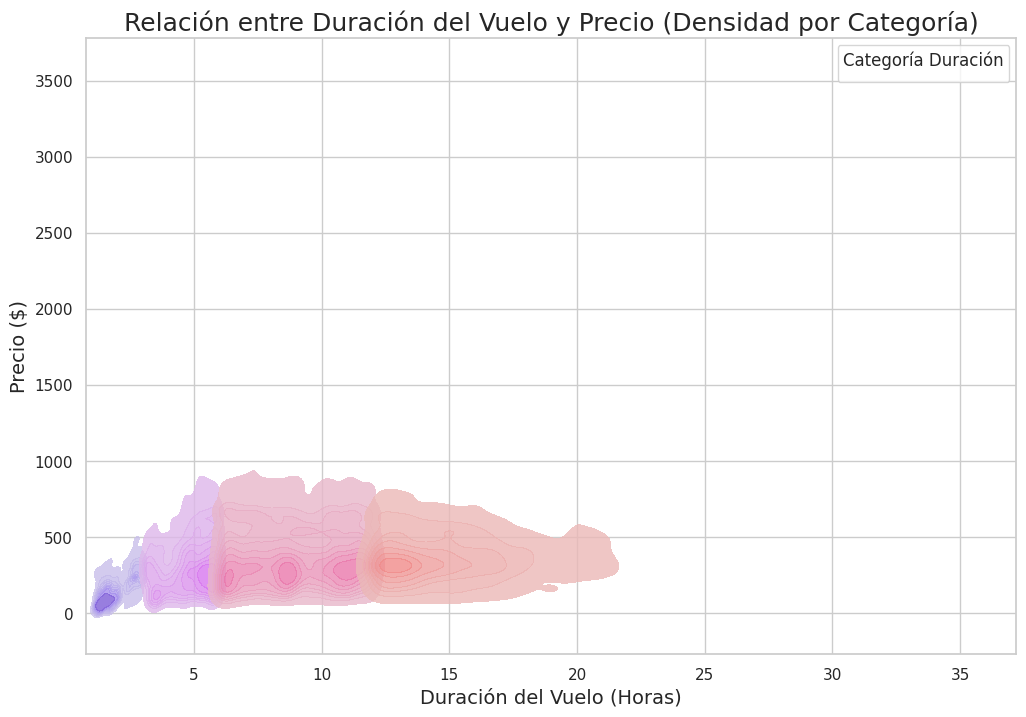

In [ ]:
# Configuración de estilo
sns.set(style='whitegrid', palette='muted')

# Verificación de las columnas necesarias
df['Month'] = df['Departure Date'].dt.month
df['Duration'] = (pd.to_datetime(df['Arrival Date']) - pd.to_datetime(df['Departure Date'])).dt.total_seconds() / 3600

# Análisis estacional
monthly_avg = df.groupby('Month')['Price'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o', color='teal')
plt.title('Análisis Estacional: Precio Promedio por Mes', fontsize=18)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Precio Promedio ($)', fontsize=14)
plt.grid(True)
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()

# Categorizar duración de vuelo
df['Duracion Categoria'] = pd.cut(df['Duration'],
                                  bins=[0, 3, 6, 12, 24, 35],
                                  labels=['Muy corto (<3h)', 'Corto (3-6h)', 'Medio (6-12h)', 'Largo (12-24h)', 'Muy Largo (>24h)'])

# Configurar el estilo del gráfico
plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')

# Graficar usando KDE
sns.kdeplot(
    data=df,
    x='Duration',
    y='Price',
    hue='Duracion Categoria',
    fill=True,
    palette='magma',
    alpha=0.8,
    linewidth=1
)

plt.title('Relación entre Duración del Vuelo y Precio (Densidad por Categoría)', fontsize=18)
plt.xlabel('Duración del Vuelo (Horas)', fontsize=14)
plt.ylabel('Precio ($)', fontsize=14)
plt.legend(title='Categoría Duración', loc='upper right', fontsize=10)
plt.grid(True)
plt.show()


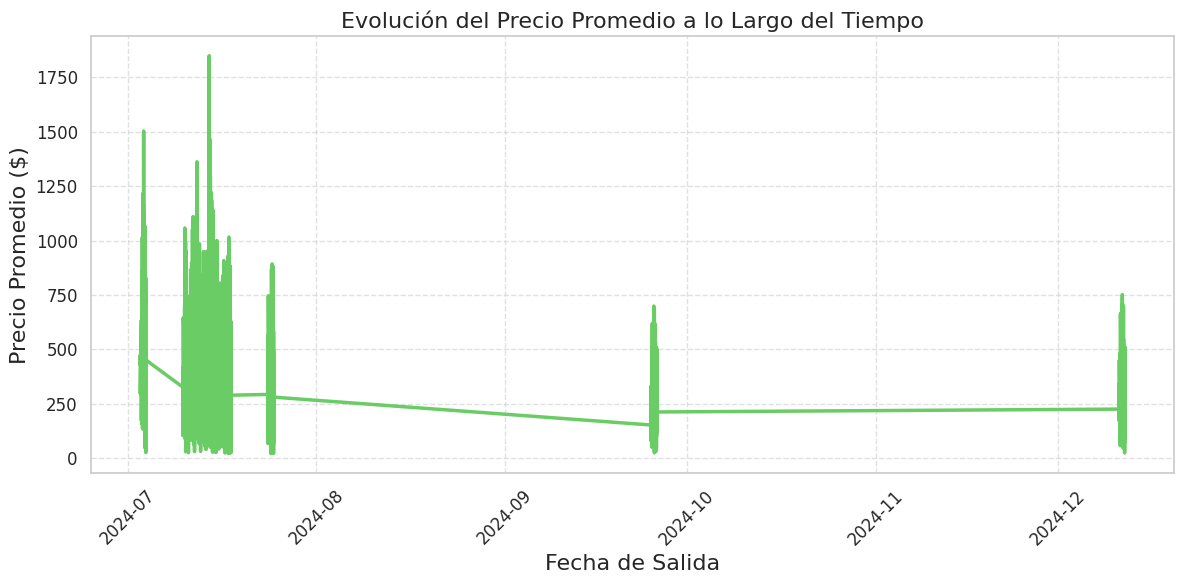

In [ ]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
palette = sns.color_palette("muted")

# Gráfico de línea con Seaborn para una apariencia más uniforme
sns.lineplot(data=df.groupby('Departure Date')['Price'].mean(), color=palette[2], linewidth=2.5)

# Configuración del título, ejes y estética
plt.title('Evolución del Precio Promedio a lo Largo del Tiempo', fontsize=16)
plt.xlabel('Fecha de Salida', fontsize=16)
plt.ylabel('Precio Promedio ($)', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



<ipython-input-14-536f4cbdbd10>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Departure Hour', y='Price', data=df, palette='viridis')


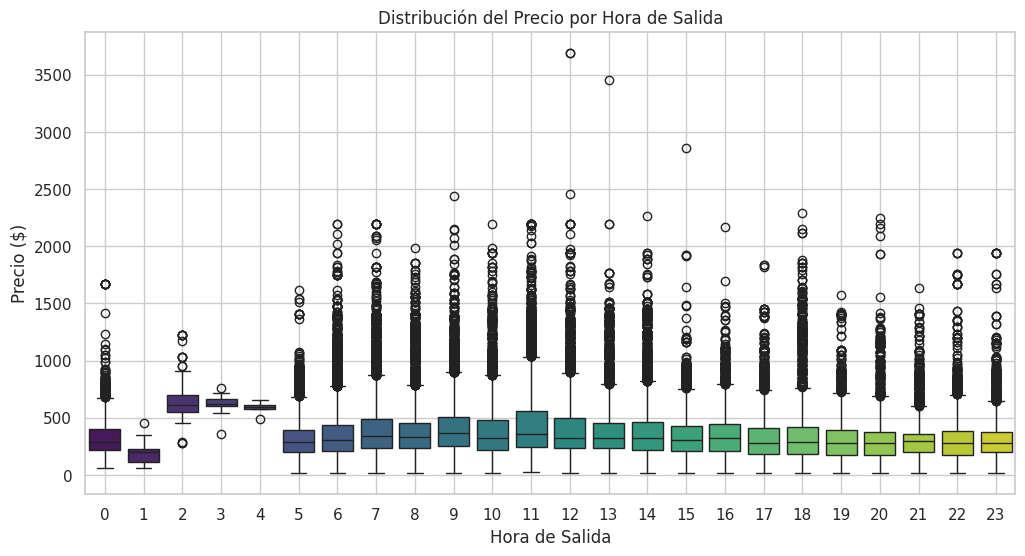

In [ ]:
df['Departure Hour'] = pd.to_datetime(df['Departure Date']).dt.hour
plt.figure(figsize=(12, 6))
sns.boxplot(x='Departure Hour', y='Price', data=df, palette='viridis')
plt.title('Distribución del Precio por Hora de Salida')
plt.xlabel('Hora de Salida')
plt.ylabel('Precio ($)')
plt.grid(True)
plt.show()



In [ ]:
# Para cada 'VueloID', marcar con 1 el precio más bajo y con 0 el resto
df['optimal_purchase'] = df.groupby('VueloID')['Price'].transform(lambda x: (x == x.min()).astype(int))

# Si 'optimal_purchase' es 1, entonces ese 'Days to Departure' es óptimo
df['Days to Buy Optimal'] = df.apply(lambda row: row['Days to Departure'] if row['optimal_purchase'] == 1 else None, axis=1)



In [ ]:
# Reemplazar los NaN por el valor más óptimo de compra identificado para cada VueloID
df['Days to Buy Optimal'] = df.groupby('VueloID')['Days to Buy Optimal'].transform(lambda x: x.ffill().bfill())


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216497 entries, 0 to 216496
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Searched Date          216497 non-null  datetime64[ns]
 1   Departure Date         216497 non-null  datetime64[ns]
 2   Arrival Date           216497 non-null  object        
 3   Flight Lands Next Day  216497 non-null  int64         
 4   Departure Airport      216497 non-null  object        
 5   Arrival Airport        216497 non-null  object        
 6   Number Of Stops        216497 non-null  int64         
 7   Route                  216497 non-null  object        
 8   Airline                216497 non-null  object        
 9   Cabin                  216497 non-null  object        
 10  Price                  216496 non-null  float64       
 11  Days to Departure      216497 non-null  int64         
 12  Departure Day          216497 non-null  obje

In [ ]:
df['Days to Buy Optimal'].value_counts()

Days to Buy Optimal
14.0     28683
15.0     20252
13.0     16998
16.0     16054
12.0     12210
17.0     11226
10.0     10390
11.0     10227
9.0       8624
18.0      7803
8.0       5393
19.0      5383
161.0     4845
20.0      4724
27.0      4005
89.0      3891
88.0      3841
21.0      3519
23.0      3182
164.0     3131
24.0      2924
163.0     2750
22.0      2576
167.0     2544
7.0       2436
90.0      2374
162.0     2098
87.0      2003
84.0      1856
25.0      1727
6.0       1726
165.0     1615
26.0      1512
166.0     1490
85.0      1269
86.0      1216
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Preparar las features (X) y las salidas (Y)
X = df[['Number Of Stops', 'Departure Day', 'Month', 'Departure Airport', 'Arrival Airport', 'Airline']]
y = df[['Price', 'Days to Buy Optimal']]  # Columna calculada previamente con el día óptimo

# Convertir variables categóricas a numéricas con OneHotEncoding
X = pd.get_dummies(X)

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo Multioutput con RandomForestRegressor
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Evaluación del modelo
mae_price = mean_absolute_error(y_test.iloc[:, 0], y_pred[:, 0])
mae_days = mean_absolute_error(y_test.iloc[:, 1], y_pred[:, 1])

print(f'MAE Precio: {mae_price:.2f}')
print(f'MAE Días óptimos para compra: {mae_days:.2f}')



MAE Precio: 83.15
MAE Días óptimos para compra: 2.66


In [ ]:
# Verificar el tipo de datos y convertirlos si es necesario
import numpy as np

y_test = np.array(y_test)
y_pred = np.array(y_pred)

# R² para el Precio
r2_precio = r2_score(y_test[:, 0], y_pred[:, 0])
print(f'R² para el Precio: {r2_precio:.2f}')

# R² para los Días Óptimos para Compra
r2_dias = r2_score(y_test[:, 1], y_pred[:, 1])
print(f'R² para los Días Óptimos para Compra: {r2_dias:.2f}')


R² para el Precio: 0.65
R² para los Días Óptimos para Compra: 0.99


Este modelo no es nada fiable.
Está claro que hay datos redundantes, voy a probar con otros datos para test y entrenamiento

In [ ]:
# Preparar las features (X) y las salidas (Y)
X = df[['Departure Date', 'Number Of Stops', 'Departure Airport', 'Arrival Airport', 'Airline']]
y = df[['Price', 'Days to Buy Optimal']]



In [ ]:
# Crear una copia segura del DataFrame
X = X.copy()
X['Departure DayOfYear'] = X['Departure Date'].dt.dayofyear
X = X.drop('Departure Date', axis=1)


In [ ]:
X.columns

Index(['Number Of Stops', 'Departure Airport', 'Arrival Airport', 'Airline',
       'Departure DayOfYear'],
      dtype='object')

In [ ]:
y.columns

Index(['Price', 'Days to Buy Optimal'], dtype='object')

In [ ]:
# Convertir variables categóricas a numéricas con OneHotEncoding
X = pd.get_dummies(X)

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo Multioutput con RandomForestRegressor
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Evaluación del modelo
mae_price = mean_absolute_error(y_test.iloc[:, 0], y_pred[:, 0])
mae_days = mean_absolute_error(y_test.iloc[:, 1], y_pred[:, 1])

print(f'MAE Precio: {mae_price:.2f}')
print(f'MAE Días óptimos para compra: {mae_days:.2f}')

MAE Precio: 80.79
MAE Días óptimos para compra: 1.56


In [ ]:
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# R² para el Precio
r2_precio = r2_score(y_test[:, 0], y_pred[:, 0])
print(f'R² para el Precio: {r2_precio:.2f}')

# R² para los Días Óptimos para Compra
r2_dias = r2_score(y_test[:, 1], y_pred[:, 1])
print(f'R² para los Días Óptimos para Compra: {r2_dias:.2f}')

R² para el Precio: 0.66
R² para los Días Óptimos para Compra: 1.00


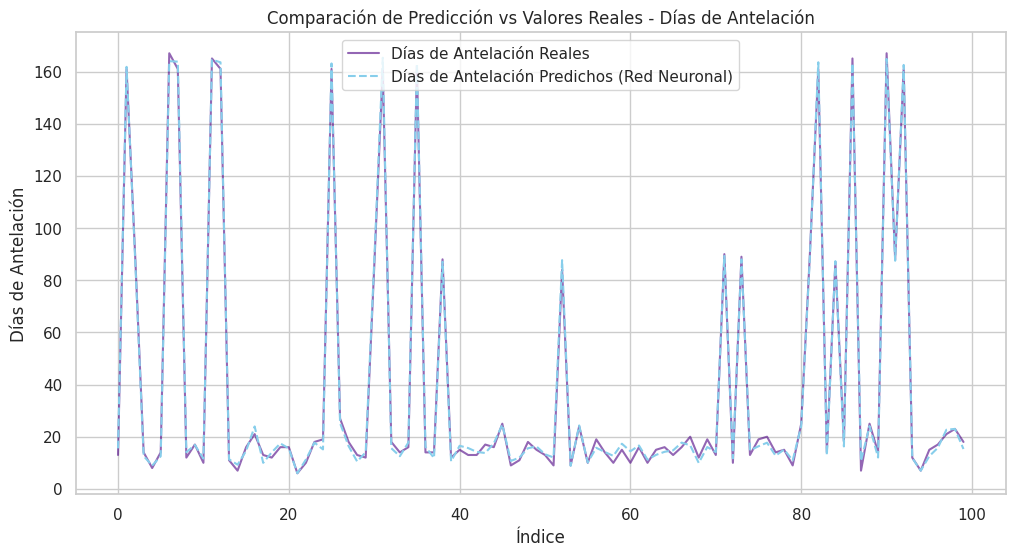

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Número de muestras
num_samples = 100
indices = np.random.choice(len(y_test), num_samples, replace=False)

# Datos reales y predichos para Días de Antelación
y_real_days = y_test[indices, 1]
y_pred_days = y_pred[indices, 1]

plt.figure(figsize=(12, 6))
plt.plot(range(num_samples), y_real_days, color="indigo", label="Días de Antelación Reales", alpha=0.6)
plt.plot(range(num_samples), y_pred_days, linestyle="dashed", color="skyblue", label="Días de Antelación Predichos (Red Neuronal)")
plt.xlabel("Índice")
plt.ylabel("Días de Antelación")
plt.title("Comparación de Predicción vs Valores Reales - Días de Antelación")
plt.legend()
plt.grid(True)
plt.show()


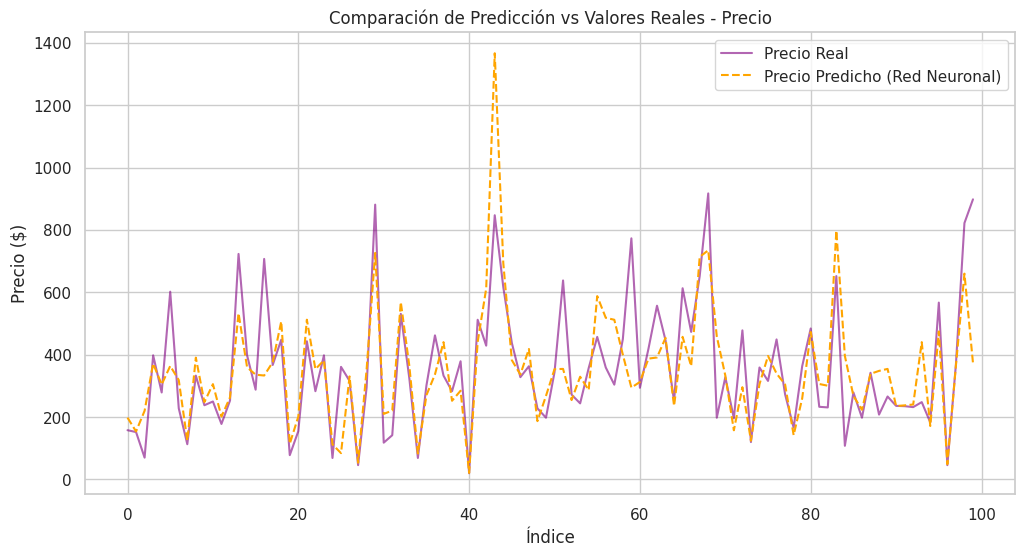

In [ ]:
# Datos reales y predichos para Precio
y_real_price = y_test[indices, 0]
y_pred_price = y_pred[indices, 0]

plt.figure(figsize=(12, 6))
plt.plot(range(num_samples), y_real_price, color="purple", label="Precio Real", alpha=0.6)
plt.plot(range(num_samples), y_pred_price, linestyle="dashed", color="orange", label="Precio Predicho (Red Neuronal)")
plt.xlabel("Índice")
plt.ylabel("Precio ($)")
plt.title("Comparación de Predicción vs Valores Reales - Precio")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
correlacion = df[['Days to Buy Optimal', 'Days to Departure', 'Number Of Stops', 'Price']].corr()
print(correlacion['Days to Buy Optimal'])


Days to Buy Optimal    1.000000
Days to Departure      0.998625
Number Of Stops       -0.012883
Price                 -0.184760
Name: Days to Buy Optimal, dtype: float64


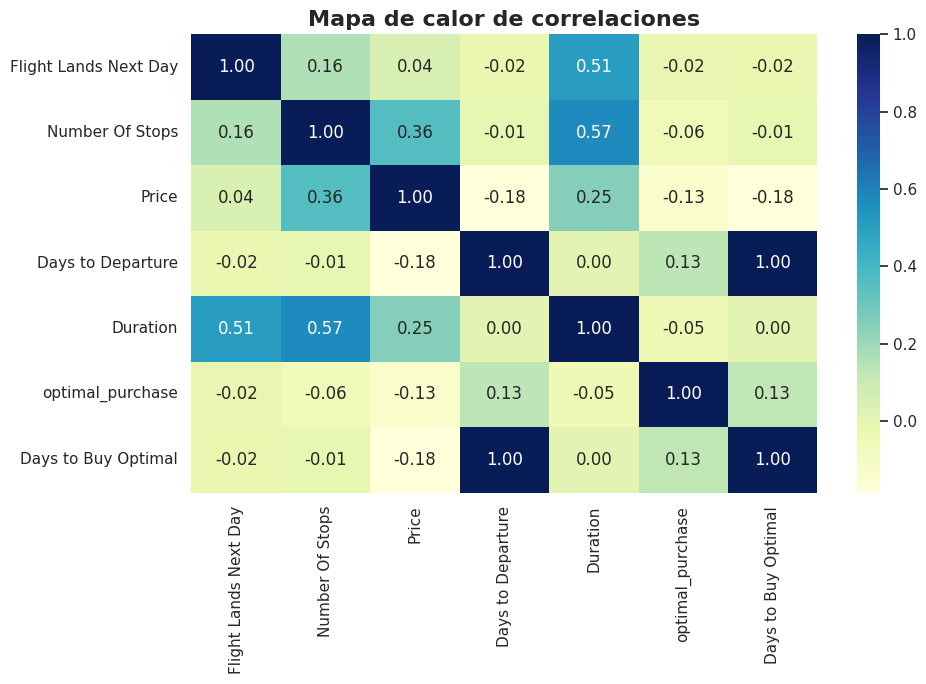

In [ ]:
#Mapa de calor
# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

# Generar el mapa de calor con una nueva paleta
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Mapa de calor de correlaciones", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score

# Separar features (X) y salidas (y)
X_2 = df[['Number Of Stops', 'Departure Day', 'Month', 'Departure Airport', 'Arrival Airport']]
y_2 = df[['Price', 'Days to Departure']]

# Preprocesamiento para variables categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Departure Airport', 'Arrival Airport']),
        ('num', 'passthrough', ['Number Of Stops'])
    ],
    remainder='drop'
)

# Modelo Multioutput
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42)))
])

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Predicción
y_pred = pipeline.predict(X_test)

# Evaluación del modelo
mae_price = mean_absolute_error(y_test['Price'], y_pred[:, 0])
mae_days = mean_absolute_error(y_test['Days to Departure'], y_pred[:, 1])
r2_price = r2_score(y_test['Price'], y_pred[:, 0])
r2_days = r2_score(y_test['Days to Departure'], y_pred[:, 1])

print(f'MAE Precio: {mae_price:.2f}')
print(f'MAE Días para la salida: {mae_days:.2f}')
print(f'R² para Precio: {r2_price:.2f}')
print(f'R² para Días para la salida: {r2_days:.2f}')


MAE Precio: 124.73
MAE Días para la salida: 31.77
R² para Precio: 0.34
R² para Días para la salida: 0.01


In [ ]:
df.columns


Index(['Searched Date', 'Departure Date', 'Arrival Date',
       'Flight Lands Next Day', 'Departure Airport', 'Arrival Airport',
       'Number Of Stops', 'Route', 'Airline', 'Cabin', 'Price',
       'Days to Departure', 'Departure Day', 'VueloID', 'Month', 'Duration',
       'Duracion Categoria', 'Departure Hour', 'optimal_purchase',
       'Days to Buy Optimal'],
      dtype='object')

In [ ]:
print(df.columns.tolist())


['Searched Date', 'Departure Date', 'Arrival Date', 'Flight Lands Next Day', 'Departure Airport', 'Arrival Airport', 'Number Of Stops', 'Route', 'Airline', 'Cabin', 'Price', 'Days to Departure', 'Departure Day', 'VueloID', 'Month', 'Duration', 'Duracion Categoria', 'Departure Hour', 'optimal_purchase', 'Days to Buy Optimal']


In [ ]:
df['Departure DayOfYear'] = df['Departure Date'].dt.dayofyear

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
# Separar features (X) y salidas (y)
X_3 = df[['Number Of Stops', 'Departure DayOfYear', 'Departure Airport', 'Arrival Airport', 'Airline']]
y_3 = df[['Price', 'Days to Buy Optimal']]

# Preprocesamiento para variables categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Departure Airport', 'Arrival Airport', 'Airline']),
        ('num', 'passthrough', ['Number Of Stops', 'Departure DayOfYear'])
    ]
)

# Modelo Multioutput con XGBoost
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MultiOutputRegressor(XGBRegressor(
        n_estimators=200,  # Más árboles para mayor precisión
        learning_rate=0.05,  # Tasa de aprendizaje moderada
        max_depth=6,  # Controla la profundidad de los árboles
        subsample=0.8,  # Evita sobreajuste
        colsample_bytree=0.8,  # Usa un 80% de las features en cada árbol
        random_state=42
    )))
])

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=0.2, random_state=42)

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Predicción
y_pred = pipeline.predict(X_test)

# Evaluación del modelo
mae_price = mean_absolute_error(y_test['Price'], y_pred[:, 0])
mae_days = mean_absolute_error(y_test['Days to Buy Optimal'], y_pred[:, 1])
r2_price = r2_score(y_test['Price'], y_pred[:, 0])
r2_days = r2_score(y_test['Days to Buy Optimal'], y_pred[:, 1])

print(f'MAE Precio: {mae_price:.2f}')
print(f'MAE Días óptimos para compra: {mae_days:.2f}')
print(f'R² para Precio: {r2_price:.2f}')
print(f'R² para Días óptimos para compra: {r2_days:.2f}')


MAE Precio: 87.78
MAE Días óptimos para compra: 1.68
R² para Precio: 0.62
R² para Días óptimos para compra: 1.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317260 entries, 0 to 317259
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Searched Date          317260 non-null  datetime64[ns]
 1   Departure Date         317260 non-null  datetime64[ns]
 2   Arrival Date           317260 non-null  object        
 3   Flight Lands Next Day  317260 non-null  int64         
 4   Departure Airport      317260 non-null  object        
 5   Arrival Airport        317260 non-null  object        
 6   Number Of Stops        317260 non-null  int64         
 7   Route                  317260 non-null  object        
 8   Airline                317260 non-null  object        
 9   Cabin                  317260 non-null  object        
 10  Price                  317260 non-null  float64       
 11  Days to Departure      317260 non-null  int64         
 12  Departure Day          317260 non-null  obje

In [ ]:
df["optimal_purchase"].value_counts()

optimal_purchase
1    112494
0    104003
Name: count, dtype: int64

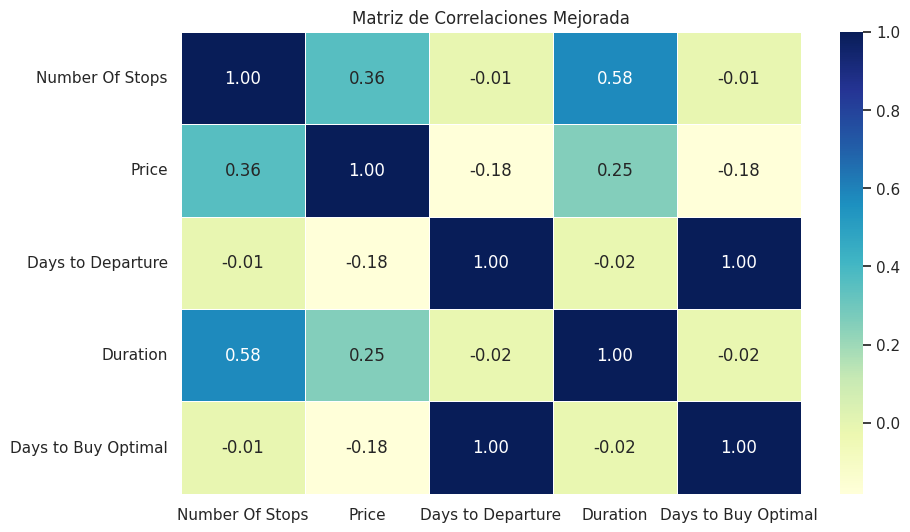

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlaciones mejorada
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Number Of Stops', 'Price', 'Days to Departure', 'Duration', 'Days to Buy Optimal']].corr(),
            annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlaciones Mejorada")
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, mean_absolute_error

# Separar features (X) y salidas (y)
X_4 = df[['Number Of Stops', 'Departure DayOfYear', 'Departure Airport', 'Arrival Airport', 'Airline']]
y_4 = df[['Price', 'optimal_purchase']]

# Preprocesamiento (OneHotEncoding para categóricas, StandardScaler para numéricas)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Departure Airport', 'Arrival Airport', 'Airline']),
        ('num', StandardScaler(), ['Number Of Stops', 'Departure DayOfYear'])
    ]
)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_4, y_4, test_size=0.2, random_state=42)

# Transformar los datos
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Crear el modelo XGBoost para Multioutput
model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Evaluar el modelo
mae_price = mean_absolute_error(y_test.iloc[:, 0], y_pred[:, 0])
accuracy_optimal_purchase = accuracy_score(y_test.iloc[:, 1].round(), y_pred[:, 1].round())  # Clasificación binaria

print(f'MAE Precio: {mae_price:.2f}')
print(f'Precisión en la predicción de optimal_purchase: {accuracy_optimal_purchase:.2%}')


MAE Precio: 84.15
Precisión en la predicción de optimal_purchase: 64.51%


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score

# MAE para Precio
mae_price = mean_absolute_error(y_test.iloc[:, 0], y_pred[:, 0])

# MAE para optimal_purchase (tratado como problema de clasificación)
mae_optimal_purchase = mean_absolute_error(y_test.iloc[:, 1], y_pred[:, 1])

# R² para Precio
r2_price = r2_score(y_test.iloc[:, 0], y_pred[:, 0])

# R² para optimal_purchase
r2_optimal_purchase = r2_score(y_test.iloc[:, 1], y_pred[:, 1])

# Para optimal_purchase, calcular precisión (solo si es una variable categórica 0/1)
y_pred_optimal_rounded = (y_pred[:, 1] >= 0.5).astype(int)  # Convertimos en 0 o 1
accuracy_optimal = accuracy_score(y_test.iloc[:, 1], y_pred_optimal_rounded)

# Imprimir resultados
print(f'MAE Precio: {mae_price:.2f}')
print(f'MAE optimal_purchase: {mae_optimal_purchase:.2f}')
print(f'R² para Precio: {r2_price:.2f}')
print(f'R² para optimal_purchase: {r2_optimal_purchase:.2f}')
print(f'Precisión en la predicción de optimal_purchase: {accuracy_optimal * 100:.2f}%')


MAE Precio: 84.15
MAE optimal_purchase: 0.44
R² para Precio: 0.65
R² para optimal_purchase: 0.12
Precisión en la predicción de optimal_purchase: 64.51%


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor, XGBClassifier
import numpy as np

# Separar las características (X) y las salidas (y)
X = df[['Number Of Stops', 'Departure DayOfYear', 'Departure Airport', 'Arrival Airport', 'Airline']]
y_price = df['Price']  # Regresión
y_optimal = df['optimal_purchase']  # Clasificación (0 o 1)

# Preprocesamiento para variables categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Departure Airport', 'Arrival Airport', 'Airline']),
        ('num', 'passthrough', ['Number Of Stops', 'Departure DayOfYear'])
    ]
)

# División en entrenamiento y prueba
X_train, X_test, y_price_train, y_price_test, y_optimal_train, y_optimal_test = train_test_split(
    X, y_price, y_optimal, test_size=0.2, random_state=42
)

# Modelos independientes
regressor = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(n_estimators=100, random_state=42))
])

classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(n_estimators=100, random_state=42))
])

# Entrenar los modelos
regressor.fit(X_train, y_price_train)
classifier.fit(X_train, y_optimal_train)

# Predicciones
y_price_pred = regressor.predict(X_test)
y_optimal_pred = classifier.predict(X_test)

# Evaluación
mae_price = mean_absolute_error(y_price_test, y_price_pred)
r2_price = r2_score(y_price_test, y_price_pred)

accuracy_optimal = (y_optimal_test == y_optimal_pred).mean()

print(f'MAE Precio: {mae_price:.2f}')
print(f'R² para Precio: {r2_price:.2f}')
print(f'Precisión en la predicción de optimal_purchase: {accuracy_optimal * 100:.2f}%')


MAE Precio: 83.99
R² para Precio: 0.65
Precisión en la predicción de optimal_purchase: 64.66%


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Calcular métricas
accuracy = accuracy_score(y_optimal_test, y_optimal_pred)
precision = precision_score(y_optimal_test, y_optimal_pred)
recall = recall_score(y_optimal_test, y_optimal_pred)
f1 = f1_score(y_optimal_test, y_optimal_pred)
roc_auc = roc_auc_score(y_optimal_test, y_optimal_pred)

# Matriz de confusión
conf_matrix = confusion_matrix(y_optimal_test, y_optimal_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')
print(f'Matriz de Confusión:\n{conf_matrix}')


🔹 Accuracy: 0.65
🔹 Precision: 0.65
🔹 Recall: 0.53
🔹 F1-Score: 0.58
🔹 ROC AUC: 0.64
🔹 Matriz de Confusión:
[[25375  8340]
 [14083 15654]]


In [ ]:
# Filtrar los días en los que optimal_purchase = 1
optimal_days = df[df['optimal_purchase'] == 1].groupby('VueloID')['Days to Departure'].min().reset_index()
optimal_days.rename(columns={'Days to Departure': 'Optimal Anticipation'}, inplace=True)

# Unir con el dataframe original
df = df.merge(optimal_days, on='VueloID', how='left')

# Verificar
df[['VueloID', 'Optimal Anticipation', 'Days to Departure', 'optimal_purchase']].head(20)


VueloID  Optimal Anticipation  \
0   2024-07-16 23:48:00_2024-07-17 15:03:00_LAS_BO...                    13   
1   2024-07-16 09:34:00_2024-07-16 19:43:00_LAS_BO...                    15   
2   2024-07-16 23:48:00_2024-07-17 15:03:00_LAS_BO...                    13   
3   2024-07-16 08:30:00_2024-07-16 19:37:00_LAS_BO...                    16   
4   2024-07-16 07:00:00_2024-07-16 16:36:00_LAS_BO...                    13   
5   2024-07-16 10:05:00_2024-07-16 20:22:00_LAS_BO...                    13   
6   2024-07-16 05:00:00_2024-07-16 15:20:00_LAS_BO...                    13   
7   2024-07-16 06:53:00_2024-07-16 17:32:00_LAS_BO...                    19   
8   2024-07-16 08:15:00_2024-07-16 19:00:00_LAS_BO...                    14   
9   2024-07-16 19:14:00_2024-07-17 06:00:00_LAS_BO...                    19   
10  2024-07-16 11:51:00_2024-07-16 22:38:00_LAS_BO...                    13   
11  2024-07-16 20:37:00_2024-07-17 07:23:00_LAS_BO...                    13   
12  2024-07-16 06:05:00_2024-07-16 17:05:00_LAS_BO...                    14   
13  2024-07-16 18:26:00_2024-07-17 07:43:00_LAS_BO...                    15   
14  2024-07-16 09:47:00_2024-07-16 20:57:00_LAS_BO...                    15   
15  2024-07-16 11:17:00_2024-07-16 19:45:00_LAS_BO...                    14   
16  2024-07-16 22:20:00_2024-07-17 06:27:00_LAS_BO...                    15   
17  2024-07-15 06:05:00_2024-07-15 12:18:00_LAX_OR...                    16   
18  2024-07-15 06:05:00_2024-07-15 12:18:00_LAX_OR...                    16   
19  2024-07-15 23:49:00_2024-07-16 06:01:00_LAX_OR...                    16   

    Days to Departure  optimal_purchase  
0                  16                 0  
1                  16                 1  
2                  16                 0  
3                  16                 1  
4                  16                 1  
5                  16                 1  
6                  16                 0  
7                  16                 0  
8                  16                 1  
9                  16                 0  
10                 16                 1  
11                 16                 1  
12                 16                 1  
13                 16                 1  
14                 16                 1  
15                 16                 0  
16                 16                 1  
17                 14                 0  
18                 14                 0  
19                 14                 0

In [ ]:
# Filtrar los días en los que optimal_purchase = 1
optimal_days = df[df['optimal_purchase'] == 1].groupby('VueloID')['Days to Departure'].min().reset_index()
optimal_days.rename(columns={'Days to Departure': 'Optimal Anticipation'}, inplace=True)

# Unir con el dataframe original
df = df.merge(optimal_days, on='VueloID', how='left')

# Filtrar los casos donde 'Days to Departure' sea igual a 'Optimal Anticipation'
df_filtered = df[df['Days to Departure'] == df['Optimal Anticipation_x']]

# Mostrar los primeros 20 resultados
df_filtered[['VueloID', 'Optimal Anticipation_x', 'Days to Departure', 'optimal_purchase']].head(20)


VueloID  Optimal Anticipation_x  \
3   2024-07-16 08:30:00_2024-07-16 19:37:00_LAS_BO...                      16   
22  2024-07-15 17:00:00_2024-07-16 01:59:00_LAX_OR...                      14   
23  2024-07-15 18:10:00_2024-07-16 00:19:00_LAX_OR...                      14   
25  2024-07-15 22:59:00_2024-07-16 05:08:00_LAX_OR...                      14   
27  2024-07-15 23:59:00_2024-07-16 06:00:00_LAX_OR...                      14   
28  2024-07-15 23:59:00_2024-07-16 06:13:00_LAX_OR...                      14   
29  2024-07-15 23:15:00_2024-07-16 05:22:00_LAX_OR...                      14   
34  2024-07-15 06:01:00_2024-07-15 12:14:00_LAX_OR...                      14   
35  2024-07-15 16:10:00_2024-07-15 23:59:00_LAX_OR...                      14   
37  2024-07-15 20:30:00_2024-07-16 04:56:00_LAX_OR...                      14   
38  2024-07-15 23:55:00_2024-07-16 11:29:00_LAX_OR...                      14   
41  2024-07-15 08:54:00_2024-07-15 19:10:00_LAX_OR...                      14   
42  2024-07-15 14:25:00_2024-07-15 22:55:00_LAX_OR...                      14   
43  2024-07-15 21:35:00_2024-07-16 05:58:00_LAX_OR...                      14   
45  2024-07-15 15:11:00_2024-07-16 00:13:00_LAX_OR...                      14   
46  2024-07-15 12:55:00_2024-07-15 21:56:00_LAX_OR...                      14   
47  2024-07-15 20:30:00_2024-07-16 05:58:00_LAX_OR...                      14   
48  2024-07-15 13:23:00_2024-07-15 19:33:00_LAX_OR...                      14   
49  2024-07-15 14:25:00_2024-07-15 23:59:00_LAX_OR...                      14   
51  2024-07-15 12:25:00_2024-07-15 18:35:00_LAX_OR...                      14   

    Days to Departure  optimal_purchase  
3                  16                 1  
22                 14                 1  
23                 14                 1  
25                 14                 1  
27                 14                 1  
28                 14                 1  
29                 14                 1  
34                 14                 1  
35                 14                 1  
37                 14                 1  
38                 14                 1  
41                 14                 1  
42                 14                 1  
43                 14                 1  
45                 14                 1  
46                 14                 1  
47                 14                 1  
48                 14                 1  
49                 14                 1  
51                 14                 1

In [ ]:
df.columns

Index(['Searched Date', 'Departure Date', 'Arrival Date',
       'Flight Lands Next Day', 'Departure Airport', 'Arrival Airport',
       'Number Of Stops', 'Route', 'Airline', 'Cabin', 'Price',
       'Days to Departure', 'Departure Day', 'VueloID', 'Month', 'Duration',
       'Duracion Categoria', 'Departure Hour', 'optimal_purchase',
       'Days to Buy Optimal', 'Departure DayOfYear', 'Optimal Anticipation_x',
       'Optimal Anticipation_y'],
      dtype='object')

In [ ]:
# Eliminar columnas redundantes
df.drop(columns=['Optimal Anticipation_x', 'Optimal Anticipation_y'], inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor, XGBClassifier
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

# Separar características (X) y salidas (y)
X = df[['Number Of Stops', 'Departure DayOfYear', 'Departure Airport', 'Arrival Airport', 'Airline']]
y_price = df['Price']  # Regresión
y_optimal = df['optimal_purchase']  # Clasificación (0 o 1)

# Preprocesamiento: Codificar variables categóricas y escalar numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Departure Airport', 'Arrival Airport', 'Airline']),
        ('num', StandardScaler(), ['Number Of Stops', 'Departure DayOfYear'])
    ]
)

# Modelos individuales
regressor = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
classifier = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)

# Pipeline para regresión
pipeline_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])

# Pipeline para clasificación
pipeline_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

# División en entrenamiento y prueba
X_train, X_test, y_train_price, y_test_price, y_train_optimal, y_test_optimal = train_test_split(
    X, y_price, y_optimal, test_size=0.2, random_state=42
)

# Entrenar modelos
pipeline_reg.fit(X_train, y_train_price)
pipeline_clf.fit(X_train, y_train_optimal)

# Predicciones
y_pred_price = pipeline_reg.predict(X_test)
y_pred_optimal = pipeline_clf.predict(X_test)

# Evaluación de regresión (Precio)
mae_price = mean_absolute_error(y_test_price, y_pred_price)
r2_price = r2_score(y_test_price, y_pred_price)

# Evaluación de clasificación (optimal_purchase)
accuracy = accuracy_score(y_test_optimal, y_pred_optimal)
precision = precision_score(y_test_optimal, y_pred_optimal)
recall = recall_score(y_test_optimal, y_pred_optimal)
f1 = f1_score(y_test_optimal, y_pred_optimal)

# Resultados
print(f'MAE Precio: {mae_price:.2f}')
print(f'R² para Precio: {r2_price:.2f}')
print(f'Accuracy optimal_purchase: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')


MAE Precio: 85.60
R² para Precio: 0.64
Accuracy optimal_purchase: 0.64
Precision: 0.65
Recall: 0.53
F1-Score: 0.58


In [ ]:
df["Cabin"].unique()

array(['Economy', 'Basic Economy', 'Blue Basic', 'Saver', 'Standard',
       'Main Cabin', 'Blue', 'Main', 'First', 'Mint', 'UltraBasic',
       'Economy Plus', 'Blue Refundable', 'BizFare', 'Business/First',
       'Main Cabin Basic', 'Main Cabin Flex', 'No Flex Fare',
       'Premium Economy', 'Main Select', 'PorterClassic Basic',
       'Discount', 'Comfort +', 'Business/First (fully refundable)',
       'Mixed', 'Basic Ec'], dtype=object)

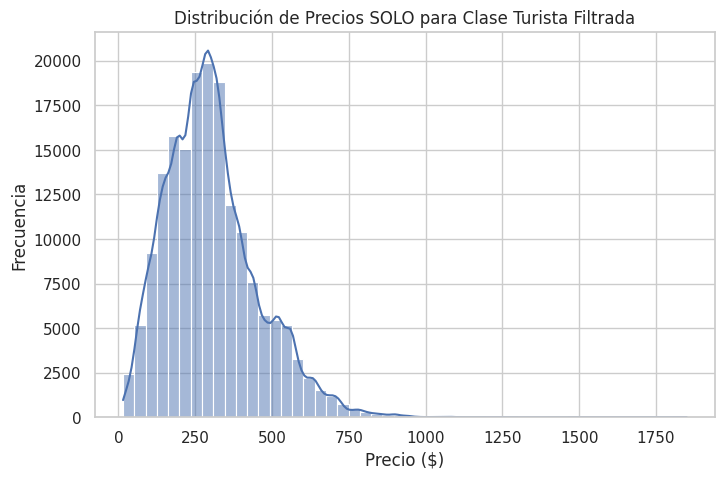

In [ ]:
# Lista de clases con precio promedio < 500 (según el gráfico)
economy_classes = [
    'Economy', 'Basic Economy', 'Blue Basic', 'Saver', 'Standard',
    'Blue', 'UltraBasic', 'Blue Refundable', 'BizFare',
    'No Flex Fare', 'Main Select', 'PorterClassic Basic',
    'Comfort +', 'Mixed'
]

# Filtrar solo los vuelos de clase económica seleccionados
df_filtered = df[df['Cabin'].isin(economy_classes)].copy()

# Visualizar la nueva distribución de precios tras el filtrado
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df_filtered['Price'], bins=50, kde=True)
plt.title('Distribución de Precios SOLO para Clase Turista Filtrada')
plt.xlabel('Precio ($)')
plt.ylabel('Frecuencia')
plt.show()


<ipython-input-28-052339536592>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cabin', y='Price', data=cabina_precios_max, palette="Paired")


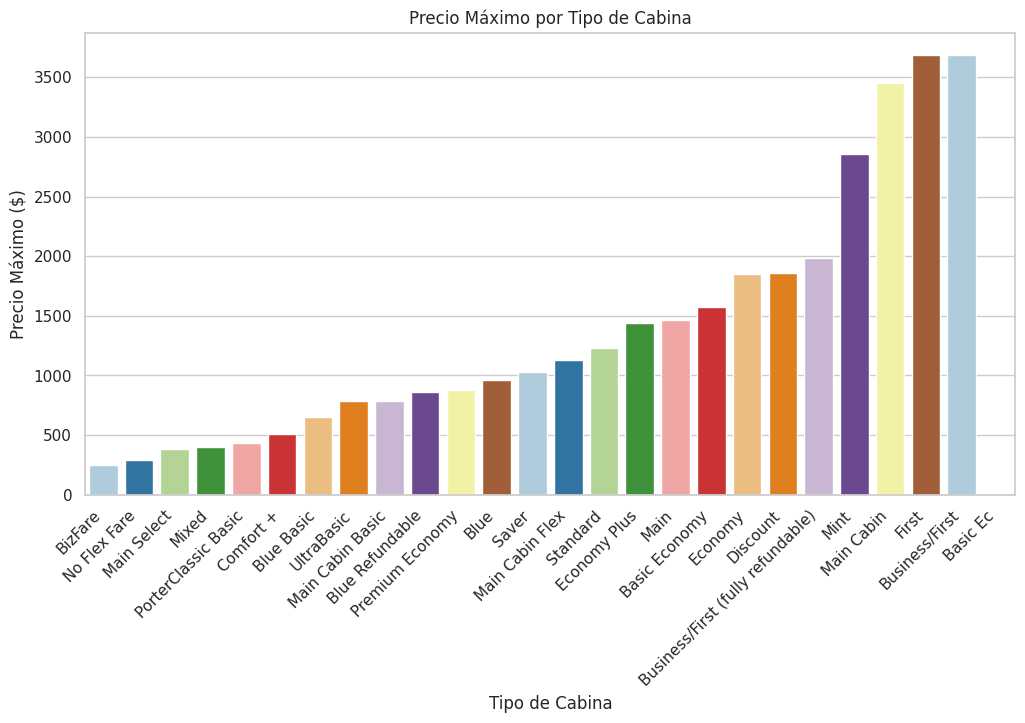

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el precio máximo por tipo de cabina
cabina_precios_max = df.groupby('Cabin')['Price'].max().reset_index()

# Ordenar por precio máximo
cabina_precios_max = cabina_precios_max.sort_values(by='Price', ascending=True)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Cabin', y='Price', data=cabina_precios_max, palette="Paired")

# Rotar etiquetas para mejor visualización
plt.xticks(rotation=45, ha='right')

# Etiquetas y título
plt.xlabel("Tipo de Cabina")
plt.ylabel("Precio Máximo ($)")
plt.title("Precio Máximo por Tipo de Cabina")

# Mostrar el gráfico
plt.show()



In [ ]:
# Lista de clases de cabina seleccionadas inicialmente (hasta "Saver")
cabinas_hasta_saver = [
    "BizFare", "No Flex Fare", "Main Select", "Mixed", "Comfort +",
    "PorterClassic Basic", "Blue Basic", "Main Cabin Basic", "Blue Refundable",
    "Premium Economy", "Blue", "Saver"
]

# Lista extendida hasta "Basic Economy" incluyendo más clases de cabina económicas
cabinas_hasta_basic_economy = cabinas_hasta_saver + [
    "Basic Economy", "Main Cabin Flex", "Standard", "UltraBasic", "Main", "Economy Plus"
]

# Filtrar el DataFrame con cada selección
df_hasta_saver = df[df['Cabin'].isin(cabinas_hasta_saver)]
df_hasta_basic_economy = df[df['Cabin'].isin(cabinas_hasta_basic_economy)]

# Mostrar cantidad de datos en cada caso
print(f"Filas con cabinas hasta 'Saver': {df_hasta_saver.shape[0]}")
print(f"Filas con cabinas hasta 'Basic Economy': {df_hasta_basic_economy.shape[0]}")



Filas con cabinas hasta 'Saver': 43794
Filas con cabinas hasta 'Basic Economy': 113413


In [ ]:
# Crear un nuevo dataframe con solo las clases de cabina seleccionadas
df_filtrado = df[df['Cabin'].isin(cabinas_hasta_basic_economy)].copy()

# Verificar la nueva distribución
print(f"Total de filas después del filtrado: {df_filtrado.shape[0]}")
print(f"Clases de cabina incluidas: {df_filtrado['Cabin'].unique()}")


Total de filas después del filtrado: 113413
Clases de cabina incluidas: ['Basic Economy' 'Blue Basic' 'Saver' 'Standard' 'Blue' 'Main'
 'UltraBasic' 'Economy Plus' 'Blue Refundable' 'BizFare'
 'Main Cabin Basic' 'Main Cabin Flex' 'No Flex Fare' 'Premium Economy'
 'Main Select' 'PorterClassic Basic' 'Comfort +' 'Mixed']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb

# Separar características (X) y salidas (y)
X = df_filtrado[['Number Of Stops', 'Departure DayOfYear', 'Departure Airport', 'Arrival Airport', 'Airline']]
y_price = df_filtrado['Price']  # Regresión
y_optimal = df_filtrado['optimal_purchase']  # Clasificación (0 o 1)

# Preprocesamiento para variables categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Departure Airport', 'Arrival Airport', 'Airline']),
        ('num', 'passthrough', ['Number Of Stops', 'Departure DayOfYear'])
    ]
)

# Modelos: Regresión para precio y Clasificación para optimal_purchase
model_price = xgb.XGBRegressor(n_estimators=100, random_state=42)
model_optimal = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Pipelines separados
pipeline_price = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model_price)])
pipeline_optimal = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model_optimal)])

# División en entrenamiento y prueba
X_train, X_test, y_train_price, y_test_price, y_train_optimal, y_test_optimal = train_test_split(
    X, y_price, y_optimal, test_size=0.2, random_state=42
)

# Entrenar los modelos
pipeline_price.fit(X_train, y_train_price)
pipeline_optimal.fit(X_train, y_train_optimal)

# Predicción
y_pred_price = pipeline_price.predict(X_test)
y_pred_optimal = pipeline_optimal.predict(X_test)

# Evaluación del modelo
mae_price = mean_absolute_error(y_test_price, y_pred_price)
r2_price = r2_score(y_test_price, y_pred_price)

accuracy_optimal = accuracy_score(y_test_optimal, y_pred_optimal)
precision_optimal = precision_score(y_test_optimal, y_pred_optimal)
recall_optimal = recall_score(y_test_optimal, y_pred_optimal)
f1_optimal = f1_score(y_test_optimal, y_pred_optimal)

# Resultados
print(f"MAE Precio: {mae_price:.2f}")
print(f"R² para Precio: {r2_price:.2f}")
print(f"Accuracy optimal_purchase: {accuracy_optimal:.2f}")
print(f"Precision: {precision_optimal:.2f}")
print(f"Recall: {recall_optimal:.2f}")
print(f"F1-Score: {f1_optimal:.2f}")


MAE Precio: 59.54
R² para Precio: 0.75
Accuracy optimal_purchase: 0.66
Precision: 0.68
Recall: 0.59
F1-Score: 0.63


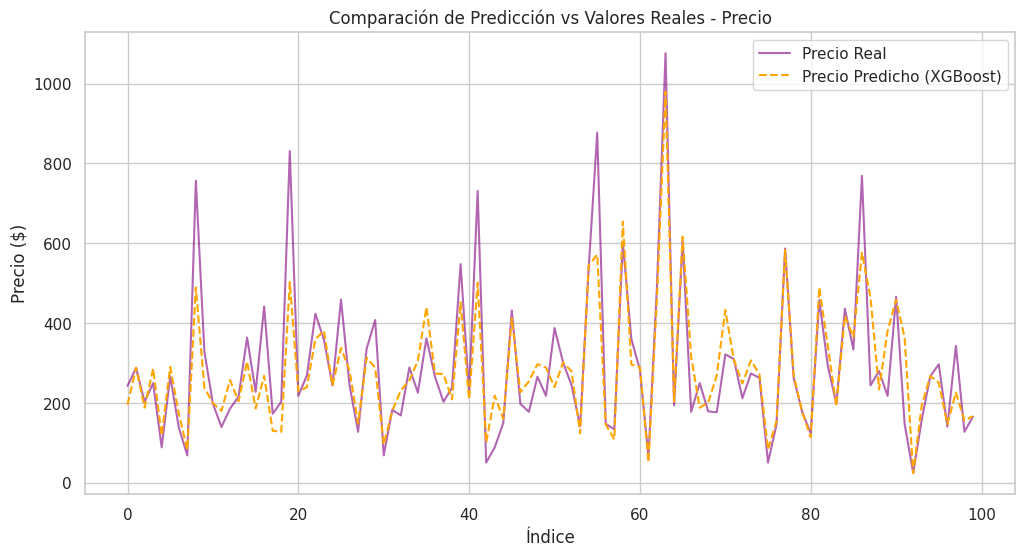

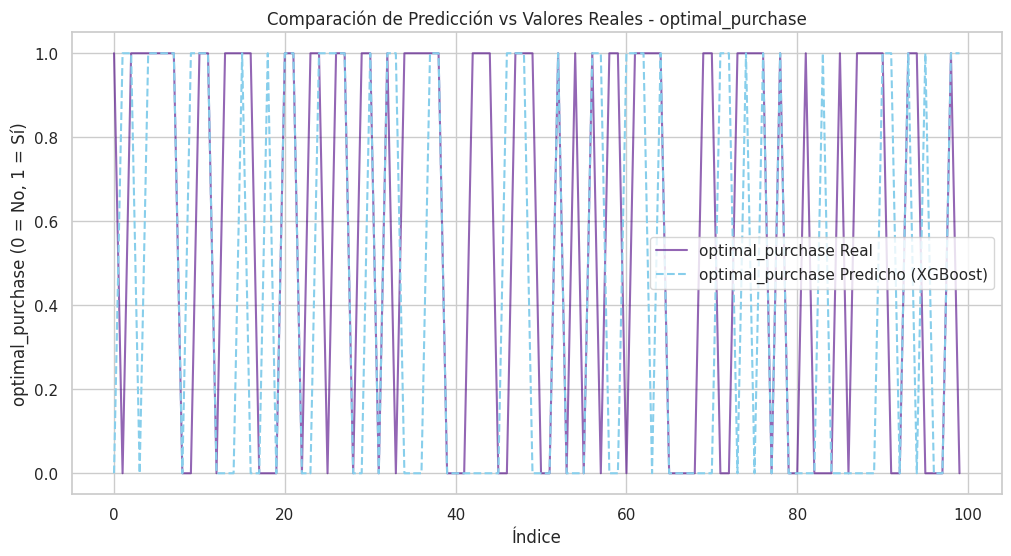

In [ ]:
# Reintentar la generación de gráficos

# Número de muestras
num_samples = 100
indices = np.random.choice(len(y_test_price), num_samples, replace=False)

# Datos reales y predichos para Precio
y_real_price = y_test_price.iloc[indices].values
y_pred_price = y_pred_price[indices]

plt.figure(figsize=(12, 6))
plt.plot(range(num_samples), y_real_price, color="purple", label="Precio Real", alpha=0.6)
plt.plot(range(num_samples), y_pred_price, linestyle="dashed", color="orange", label="Precio Predicho (XGBoost)")
plt.xlabel("Índice")
plt.ylabel("Precio ($)")
plt.title("Comparación de Predicción vs Valores Reales - Precio")
plt.legend()
plt.grid(True)
plt.show()

# Datos reales y predichos para optimal_purchase (clasificación)
y_real_optimal = y_test_optimal.iloc[indices].values
y_pred_optimal = y_pred_optimal[indices]

plt.figure(figsize=(12, 6))
plt.plot(range(num_samples), y_real_optimal, color="indigo", label="optimal_purchase Real", alpha=0.6)
plt.plot(range(num_samples), y_pred_optimal, linestyle="dashed", color="skyblue", label="optimal_purchase Predicho (XGBoost)")
plt.xlabel("Índice")
plt.ylabel("optimal_purchase (0 = No, 1 = Sí)")
plt.title("Comparación de Predicción vs Valores Reales - optimal_purchase")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Cargar y preprocesar datos
X = df_filtrado[['Number Of Stops', 'Departure DayOfYear', 'Departure Airport', 'Arrival Airport', 'Airline']]
y_price = df_filtrado['Price']  # Regresión
y_days_to_departure = df_filtrado['Days to Departure']  # Regresión

# OneHotEncoding para variables categóricas
cat_features = ['Departure Airport', 'Arrival Airport', 'Airline']
num_features = ['Number Of Stops', 'Departure DayOfYear']

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_cat = ohe.fit_transform(X[cat_features])
scaler = StandardScaler()
X_num = scaler.fit_transform(X[num_features])

# Concatenar características
X_processed = np.hstack([X_num, X_cat])

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, np.column_stack((y_price, y_days_to_departure)), test_size=0.2, random_state=42
)

# Separar salidas en conjuntos de entrenamiento y prueba
y_train_price, y_train_days = y_train[:, 0], y_train[:, 1]
y_test_price, y_test_days = y_test[:, 0], y_test[:, 1]

# Construcción del modelo
input_layer = Input(shape=(X_train.shape[1],))

# Bloque común
x = Dense(128, activation='relu')(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# Rama de regresión para el precio
price_output = Dense(1, activation='linear', name='price_output')(x)

# Rama de regresión para Days to Departure
days_output = Dense(1, activation='linear', name='days_output')(x)

# Construcción del modelo
model = Model(inputs=input_layer, outputs=[price_output, days_output])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss={'price_output': 'mse', 'days_output': 'mse'},
              metrics={'price_output': 'mae', 'days_output': 'mae'})

# Entrenamiento del modelo
epochs = 50
history = model.fit(X_train, {'price_output': y_train_price, 'days_output': y_train_days},
                    validation_data=(X_test, {'price_output': y_test_price, 'days_output': y_test_days}),
                    epochs=epochs, batch_size=64, verbose=1)

# Evaluación del modelo
results = model.evaluate(X_test, {'price_output': y_test_price, 'days_output': y_test_days})
print(f'MAE Precio: {results[3]:.2f}')
print(f'MAE Days to Departure: {results[4]:.2f}')


Epoch 1/50
2083/2083 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - days_output_loss: 2362.2908 - days_output_mae: 32.6446 - loss: 95843.2969 - price_output_loss: 93480.9844 - price_output_mae: 259.9243 - val_days_output_loss: 40.0842 - val_days_output_mae: 4.4922 - val_loss: 12093.8418 - val_price_output_loss: 12051.5225 - val_price_output_mae: 73.3320
Epoch 2/50
2083/2083 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - days_output_loss: 264.3073 - days_output_mae: 11.9929 - loss: 13820.5303 - price_output_loss: 13556.2266 - price_output_mae: 80.1892 - val_days_output_loss: 32.6654 - val_days_output_mae: 4.0926 - val_loss: 11057.3066 - val_price_output_loss: 11022.6621 - val_price_output_mae: 69.8647
Epoch 3/50
2083/2083 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - days_output_loss: 278.1882 - days_output_mae: 12.2406 - loss: 13356.6191 - price_output_loss: 13078.4365 - price_output_mae: 78.9458 - val_days_output_loss: 30.4822 - val_days_output_mae: 3.9517 - val_loss: 10988.4824 - val_price_output_loss: 10955.8662 - 

In [ ]:
from sklearn.metrics import r2_score

# Obtener predicciones del modelo
y_pred_price, y_pred_days = model.predict(X_test)

# Calcular R^2 para cada variable objetivo
r2_price = r2_score(y_test_price, y_pred_price)
r2_days = r2_score(y_test_days, y_pred_days)

# Mostrar resultados
print(f'R² para Precio: {r2_price:.2f}')
print(f'R² para Days to Departure: {r2_days:.2f}')


1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
R² para Precio: 0.71
R² para Days to Departure: 0.99


In [ ]:
# Ver la longitud del DataFrame completo
print(f'Tamaño total del DataFrame: {len(df_filtrado)}')

# Ver la cantidad de datos en entrenamiento y prueba
print(f'Tamaño de X_train: {len(X_train)}')
print(f'Tamaño de X_test: {len(X_test)}')
print(f'Tamaño de y_train_price: {len(y_train_price)}')
print(f'Tamaño de y_test_price: {len(y_test_price)}')
print(f'Tamaño de y_train_days: {len(y_train_days)}')
print(f'Tamaño de y_test_days: {len(y_test_days)}')


Tamaño total del DataFrame: 166608
Tamaño de X_train: 133286
Tamaño de X_test: 33322
Tamaño de y_train_price: 133286
Tamaño de y_test_price: 33322
Tamaño de y_train_days: 133286
Tamaño de y_test_days: 33322


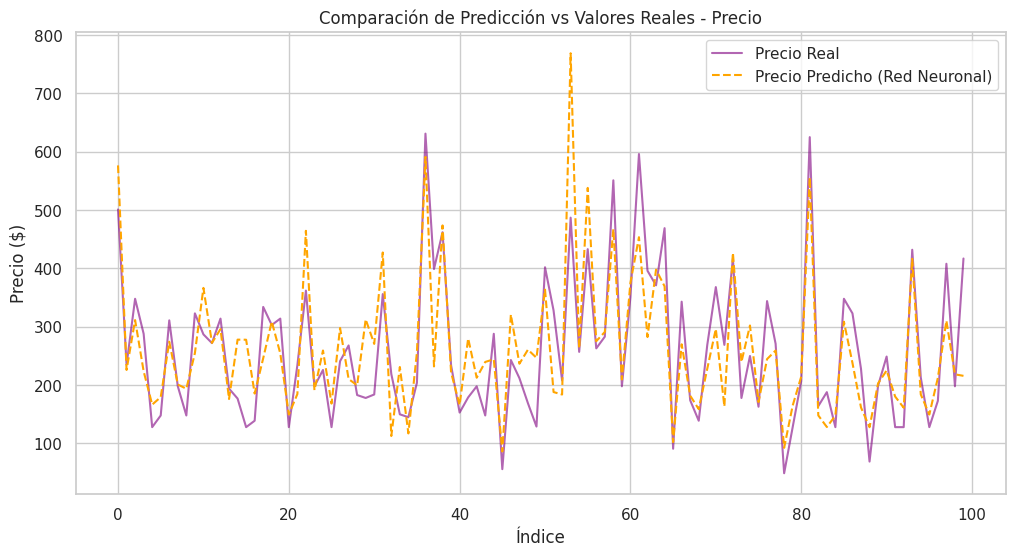

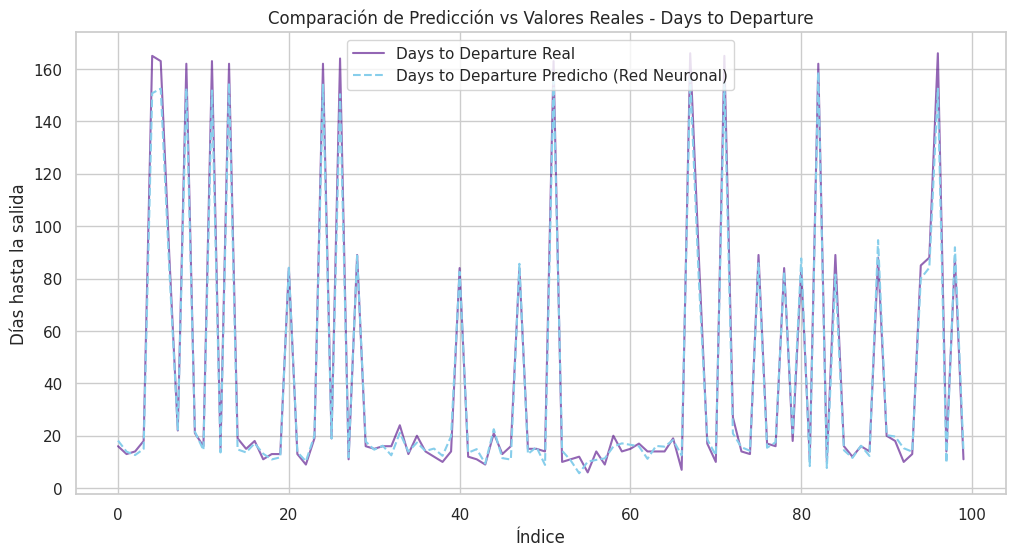

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Número de muestras
num_samples = 100
indices = np.random.choice(len(y_test_price), num_samples, replace=False)

# Datos reales y predichos para Precio
y_real_price = y_test_price[indices]
y_pred_price = y_pred_price[indices]

plt.figure(figsize=(12, 6))
plt.plot(range(num_samples), y_real_price, color="purple", label="Precio Real", alpha=0.6)
plt.plot(range(num_samples), y_pred_price, linestyle="dashed", color="orange", label="Precio Predicho (Red Neuronal)")
plt.xlabel("Índice")
plt.ylabel("Precio ($)")
plt.title("Comparación de Predicción vs Valores Reales - Precio")
plt.legend()
plt.grid(True)
plt.show()

# Datos reales y predichos para Days to Departure (regresión)
y_real_days = y_test_days[indices]
y_pred_days = y_pred_days[indices]

plt.figure(figsize=(12, 6))
plt.plot(range(num_samples), y_real_days, color="indigo", label="Days to Departure Real", alpha=0.6)
plt.plot(range(num_samples), y_pred_days, linestyle="dashed", color="skyblue", label="Days to Departure Predicho (Red Neuronal)")
plt.xlabel("Índice")
plt.ylabel("Días hasta la salida")
plt.title("Comparación de Predicción vs Valores Reales - Days to Departure")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Cargar y preprocesar datos
X = df_filtrado[['Number Of Stops', 'Departure DayOfYear', 'Departure Airport', 'Arrival Airport', 'Airline']]
y_price = df_filtrado['Price']  # Regresión
y_days_to_departure = df_filtrado['Days to Departure']  # Regresión

# OneHotEncoding para variables categóricas
cat_features = ['Departure Airport', 'Arrival Airport', 'Airline']
num_features = ['Number Of Stops', 'Departure DayOfYear']

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_cat = ohe.fit_transform(X[cat_features])
scaler = StandardScaler()
X_num = scaler.fit_transform(X[num_features])

# Concatenar características
X_processed = np.hstack([X_num, X_cat])

# Dividir en train y test
X_train, X_test, y_train_price, y_test_price, y_train_days, y_test_days = train_test_split(
    X_processed, y_price, y_days_to_departure, test_size=0.2, random_state=42
)

# Convertir y_train_days en numpy array
y_train_price = np.array(y_train_price)
y_test_price = np.array(y_test_price)
y_train_days = np.array(y_train_days)
y_test_days = np.array(y_test_days)

# Construcción del modelo
input_layer = Input(shape=(X_train.shape[1],))

# Bloque común
x = Dense(256, activation='relu')(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# Rama de regresión para el precio
price_output = Dense(1, activation='relu', name='price_output')(x)

# Rama de regresión para Days to Departure
days_output = Dense(1, activation='relu', name='days_output')(x)

# Construcción del modelo
model = Model(inputs=input_layer, outputs=[price_output, days_output])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss={'price_output': 'mse', 'days_output': 'mse'},
              metrics={'price_output': 'mae', 'days_output': 'mae'})
# Ver la longitud del DataFrame completo
print(f'Tamaño total del DataFrame: {len(df_filtrado)}')

# Ver la cantidad de datos en entrenamiento y prueba
print(f'Tamaño de X_train: {len(X_train)}')
print(f'Tamaño de X_test: {len(X_test)}')
print(f'Tamaño de y_train_price: {len(y_train_price)}')
print(f'Tamaño de y_test_price: {len(y_test_price)}')
print(f'Tamaño de y_train_days: {len(y_train_days)}')
print(f'Tamaño de y_test_days: {len(y_test_days)}')

# Entrenamiento del modelo
epochs = 50
history = model.fit(X_train, {'price_output': y_train_price, 'days_output': y_train_days},
                    validation_data=(X_test, {'price_output': y_test_price, 'days_output': y_test_days}),
                    epochs=epochs, batch_size=64, verbose=1)

# Evaluación del modelo
results = model.evaluate(X_test, {'price_output': y_test_price, 'days_output': y_test_days})
print(f'MAE Precio: {results[3]:.2f}')
print(f'MAE Days to Departure: {results[4]:.2f}')

# Obtener predicciones del modelo
y_pred_price, y_pred_days = model.predict(X_test)

# Calcular R^2 para cada variable objetivo
r2_price = r2_score(y_test_price, y_pred_price)
r2_days = r2_score(y_test_days, y_pred_days)

# Mostrar resultados
print(f'R² para Precio: {r2_price:.2f}')
print(f'R² para Days to Departure: {r2_days:.2f}')


Tamaño total del DataFrame: 166608
Tamaño de X_train: 133286
Tamaño de X_test: 33322
Tamaño de y_train_price: 133286
Tamaño de y_test_price: 33322
Tamaño de y_train_days: 133286
Tamaño de y_test_days: 33322
Epoch 1/50
2083/2083 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - days_output_loss: 2242.8914 - days_output_mae: 29.0250 - loss: 79483.5859 - price_output_loss: 77240.6797 - price_output_mae: 228.7380 - val_days_output_loss: 209.3598 - val_days_output_mae: 13.5163 - val_loss: 19015.1230 - val_price_output_loss: 18804.1816 - val_price_output_mae: 99.4847
Epoch 2/50
2083/2083 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - days_output_loss: 287.5723 - days_output_mae: 14.4319 - loss: 19315.1230 - price_output_loss: 19027.5293 - price_output_mae: 100.5763 - val_days_output_loss: 77.5475 - val_days_output_mae: 7.5356 - val_loss: 11284.9766 - val_price_output_loss: 11205.8398 - val_price_output_mae: 70.6503
Epoch 3/50
2083/2083 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - days_output_loss: 195.7479 - days_output_mae:

In [ ]:
from sklearn.metrics import r2_score

# Obtener predicciones del modelo
y_pred_price, y_pred_days = model.predict(X_test)

# Calcular R^2 para cada variable objetivo
r2_price = r2_score(y_test_price, y_pred_price)
r2_days = r2_score(y_test_days, y_pred_days)

# Mostrar resultados
print(f'R² para Precio: {r2_price:.2f}')
print(f'R² para Days to Departure: {r2_days:.2f}')


1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
R² para Precio: 0.72
R² para Days to Departure: 0.98


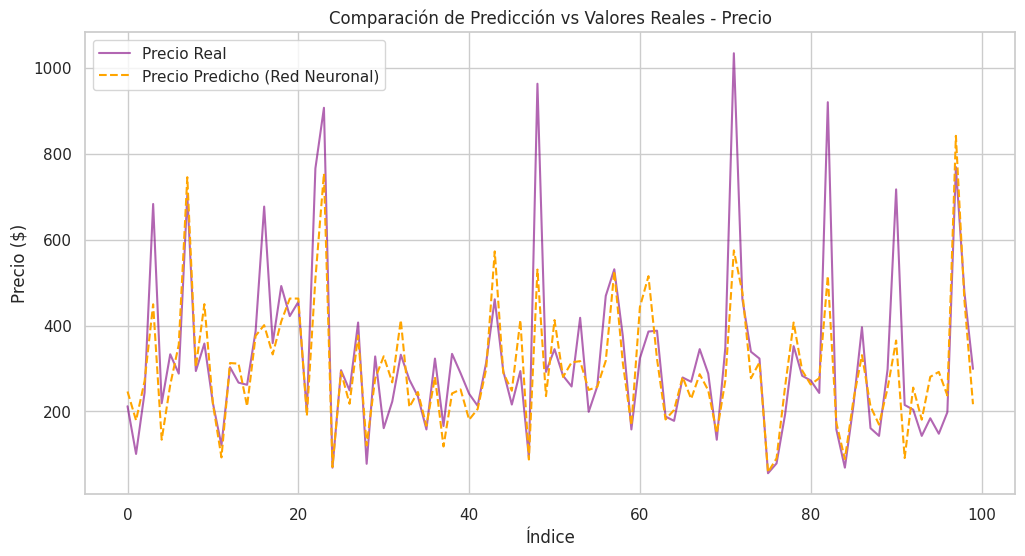

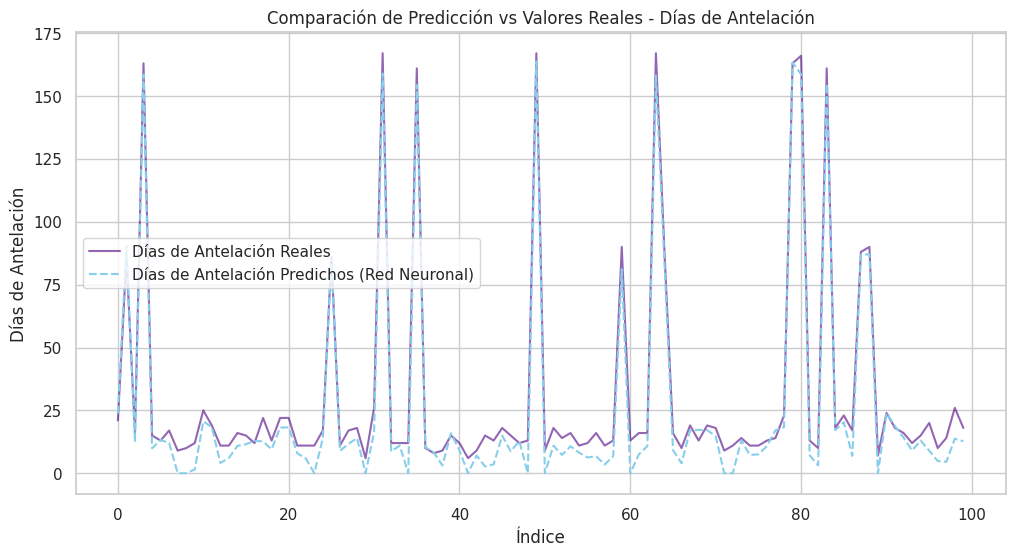

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Número de muestras aleatorias para graficar
num_samples = 100
indices = np.random.choice(len(y_test_price), num_samples, replace=False)

# Datos reales y predichos para Precio
y_real_price = y_test_price[indices]
y_pred_price = y_pred_price[indices]

plt.figure(figsize=(12, 6))
plt.plot(range(num_samples), y_real_price, color="purple", label="Precio Real", alpha=0.6)
plt.plot(range(num_samples), y_pred_price, linestyle="dashed", color="orange", label="Precio Predicho (Red Neuronal)")
plt.xlabel("Índice")
plt.ylabel("Precio ($)")
plt.title("Comparación de Predicción vs Valores Reales - Precio")
plt.legend()
plt.grid(True)
plt.show()

# Datos reales y predichos para Days to Departure
y_real_days = y_test_days[indices]
y_pred_days = y_pred_days[indices]

plt.figure(figsize=(12, 6))
plt.plot(range(num_samples), y_real_days, color="indigo", label="Días de Antelación Reales", alpha=0.6)
plt.plot(range(num_samples), y_pred_days, linestyle="dashed", color="skyblue", label="Días de Antelación Predichos (Red Neuronal)")
plt.xlabel("Índice")
plt.ylabel("Días de Antelación")
plt.title("Comparación de Predicción vs Valores Reales - Días de Antelación")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from tensorflow.keras.optimizers import Adam, Adagrad, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Configurar los parámetros
optimizer_choice = 'adam'  # Opciones: 'adam', 'adagrad', 'rmsprop'
num_epochs = 100  # Aumentamos las épocas para que aprenda mejor
early_stop_patience = 10  # Si no mejora en 10 épocas, detenemos

# Configurar el optimizador según la elección
if optimizer_choice == 'adam':
    optimizer = Adam(learning_rate=0.01)
elif optimizer_choice == 'adagrad':
    optimizer = Adagrad(learning_rate=0.01)
elif optimizer_choice == 'rmsprop':
    optimizer = RMSprop(learning_rate=0.01)

# Callback para reducir el learning rate si la pérdida no mejora
lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)

# Callback para detener el entrenamiento si no mejora en X épocas
early_stopping = EarlyStopping(monitor='val_loss', patience=early_stop_patience, restore_best_weights=True)

# Construcción del modelo
input_layer = Input(shape=(X_train.shape[1],))

x = Dense(128, activation='relu')(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# Salida para el Precio
price_output = Dense(1, activation='linear', name='price_output')(x)

# Construcción del modelo
model = Model(inputs=input_layer, outputs=price_output)
# Ver la longitud del DataFrame completo
print(f'Tamaño total del DataFrame: {len(df_filtrado)}')

# Ver la cantidad de datos en entrenamiento y prueba
print(f'Tamaño de X_train: {len(X_train)}')
print(f'Tamaño de X_test: {len(X_test)}')
print(f'Tamaño de y_train_price: {len(y_train_price)}')
print(f'Tamaño de y_test_price: {len(y_test_price)}')
print(f'Tamaño de y_train_days: {len(y_train_days)}')
print(f'Tamaño de y_test_days: {len(y_test_days)}')

# Compilar el modelo con el optimizador seleccionado
model.compile(optimizer=optimizer,
              loss='mse',
              metrics=['mae'])

# Entrenamiento del modelo
history = model.fit(X_train, y_train_price,
                    validation_data=(X_test, y_test_price),
                    epochs=num_epochs, batch_size=64, verbose=1,
                    callbacks=[lr_callback, early_stopping])  # Callbacks añadidos

# Evaluación del modelo
results = model.evaluate(X_test, y_test_price)
print(f'MAE Precio: {results[1]:.2f}')

# Obtener R²
y_pred_price = model.predict(X_test)
r2_price = r2_score(y_test_price, y_pred_price)
print(f'R² para Precio: {r2_price:.2f}')


Tamaño total del DataFrame: 166608
Tamaño de X_train: 133286
Tamaño de X_test: 33322
Tamaño de y_train_price: 133286
Tamaño de y_test_price: 33322
Tamaño de y_train_days: 133286
Tamaño de y_test_days: 33322
Epoch 1/100
2083/2083 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 33274.1719 - mae: 127.0133 - val_loss: 11662.7412 - val_mae: 72.6884 - learning_rate: 0.0100
Epoch 2/100
2083/2083 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 13161.7549 - mae: 79.1316 - val_loss: 11368.6709 - val_mae: 70.3946 - learning_rate: 0.0100
Epoch 3/100
2083/2083 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 12964.1533 - mae: 77.9990 - val_loss: 11219.5791 - val_mae: 70.9865 - learning_rate: 0.0100
Epoch 4/100
2083/2083 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 13063.7812 - mae: 78.1901 - val_loss: 11110.4414 - val_mae: 69.1597 - learning_rate: 0.0100
Epoch 5/100
2083/2083 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 12839.2021 - mae: 77.4819 - val_loss: 11018.7656 - val_mae: 68.6181 - learning_rate: 0.0100
Epoch 6/100
2083

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop, Adagrad, Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Cargar y preprocesar datos
X = df_filtrado[['Number Of Stops', 'Departure DayOfYear', 'Departure Airport', 'Arrival Airport', 'Airline']]
y_price = df_filtrado['Price']
y_days_to_departure = df_filtrado['Days to Departure']

# OneHotEncoding para variables categóricas
cat_features = ['Departure Airport', 'Arrival Airport', 'Airline']
num_features = ['Number Of Stops', 'Departure DayOfYear']

# Aplicar OneHotEncoding correctamente
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_cat = ohe.fit_transform(X[cat_features])

# Aplicar escalado a las variables numéricas
scaler = StandardScaler()
X_num = scaler.fit_transform(X[num_features])

# Concatenar características procesadas
X_processed = np.hstack([X_num, X_cat])

# Dividir en train y test
X_train, X_test, y_train_price, y_test_price, y_train_days, y_test_days = train_test_split(
    X_processed, y_price, y_days_to_departure, test_size=0.2, random_state=42
)

# Convertir y_train_days en numpy array
y_train_price = np.array(y_train_price)
y_test_price = np.array(y_test_price)
y_train_days = np.array(y_train_days)
y_test_days = np.array(y_test_days)

# Construcción del modelo
input_layer = Input(shape=(X_train.shape[1],))

# Bloque común
x = Dense(256, activation='relu')(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# Rama de regresión para el precio
price_output = Dense(1, activation='linear', name='price_output')(x)

# Rama de regresión para Days to Departure
days_output = Dense(1, activation='linear', name='days_output')(x)

# Construcción del modelo
model = Model(inputs=input_layer, outputs=[price_output, days_output])

# Elegir optimizador
optimizer = RMSprop(learning_rate=0.001)  # Puedes cambiar a Adagrad(0.001) o Adam(0.001)
# Ver la cantidad de datos en entrenamiento y prueba
print(f'Tamaño de X_train: {len(X_train)}')
print(f'Tamaño de X_test: {len(X_test)}')
print(f'Tamaño de y_train_price: {len(y_train_price)}')
print(f'Tamaño de y_test_price: {len(y_test_price)}')
print(f'Tamaño de y_train_days: {len(y_train_days)}')
print(f'Tamaño de y_test_days: {len(y_test_days)}')

# Compilar el modelo
model.compile(optimizer=optimizer,
              loss={'price_output': 'mse', 'days_output': 'mse'},
              metrics={'price_output': 'mae', 'days_output': 'mae'})

# Early stopping para evitar sobreajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenamiento del modelo con más épocas
epochs = 100
history = model.fit(X_train, {'price_output': y_train_price, 'days_output': y_train_days},
                    validation_data=(X_test, {'price_output': y_test_price, 'days_output': y_test_days}),
                    epochs=epochs, batch_size=64, verbose=1, callbacks=[early_stopping])

# Evaluación del modelo
results = model.evaluate(X_test, {'price_output': y_test_price, 'days_output': y_test_days})
print(f'MAE Precio: {results[3]:.2f}')
print(f'MAE Days to Departure: {results[4]:.2f}')


Tamaño de X_train: 133286
Tamaño de X_test: 33322
Tamaño de y_train_price: 133286
Tamaño de y_test_price: 33322
Tamaño de y_train_days: 133286
Tamaño de y_test_days: 33322
Epoch 1/100
2083/2083 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - days_output_loss: 2513.9387 - days_output_mae: 34.8661 - loss: 103026.5156 - price_output_loss: 100512.5859 - price_output_mae: 274.6041 - val_days_output_loss: 32.8394 - val_days_output_mae: 4.3164 - val_loss: 12870.1348 - val_price_output_loss: 12834.6074 - val_price_output_mae: 74.0588
Epoch 2/100
2083/2083 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - days_output_loss: 290.8033 - days_output_mae: 12.6028 - loss: 13936.1250 - price_output_loss: 13645.3262 - price_output_mae: 80.3170 - val_days_output_loss: 50.3839 - val_days_output_mae: 4.9478 - val_loss: 11094.1699 - val_price_output_loss: 11041.3662 - val_price_output_mae: 69.1778
Epoch 3/100
2083/2083 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - days_output_loss: 284.1986 - days_output_mae: 12.3631 - loss: 13146.0664 - pri

In [ ]:
from sklearn.metrics import r2_score

# Obtener predicciones del modelo
y_pred_price, y_pred_days = model.predict(X_test)

# Calcular R^2 para cada variable objetivo
r2_price = r2_score(y_test_price, y_pred_price)
r2_days = r2_score(y_test_days, y_pred_days)

# Mostrar resultados
print(f'R² para Precio: {r2_price:.2f}')
print(f'R² para Days to Departure: {r2_days:.2f}')

1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
R² para Precio: 0.73
R² para Days to Departure: 0.99


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Definir features y objetivo
X = df_filtrado[['Number Of Stops', 'Departure DayOfYear', 'Departure Airport', 'Arrival Airport', 'Airline']]
y_price = df_filtrado['Price']
y_days = df_filtrado['Days to Departure']  # Prueba con y sin esta variable

# OneHotEncoding para variables categóricas
cat_features = ['Departure Airport', 'Arrival Airport', 'Airline']
num_features = ['Number Of Stops', 'Departure DayOfYear']

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_cat = ohe.fit_transform(X[cat_features])

scaler = StandardScaler()
X_num = scaler.fit_transform(X[num_features])

X_prepared = np.hstack([X_num, X_cat])

# Dividir en train y test
X_train, X_test, y_train_price, y_test_price, y_train_days, y_test_days = train_test_split(
    X_prepared, y_price, y_days, test_size=0.2, random_state=42
)

# Modelo XGBoost ajustado
xgb_model_price = xgb.XGBRegressor(
    max_depth=8,  # Mayor profundidad para más detalle
    learning_rate=0.05,  # Reducimos la tasa de aprendizaje
    n_estimators=500,  # Más estimadores para mejorar generalización
    objective='reg:squarederror',
    random_state=42
)

xgb_model_days = xgb.XGBRegressor(
    max_depth=8,
    learning_rate=0.05,
    n_estimators=500,
    objective='reg:squarederror',
    random_state=42
)

# Entrenar modelos
xgb_model_price.fit(X_train, y_train_price)
xgb_model_days.fit(X_train, y_train_days)

# Predicción
y_pred_price = xgb_model_price.predict(X_test)
y_pred_days = xgb_model_days.predict(X_test)

# Evaluación del modelo
mae_price = mean_absolute_error(y_test_price, y_pred_price)
r2_price = r2_score(y_test_price, y_pred_price)

mae_days = mean_absolute_error(y_test_days, y_pred_days)
r2_days = r2_score(y_test_days, y_pred_days)

print(f'MAE Precio: {mae_price:.2f}')
print(f'R² para Precio: {r2_price:.2f}')
print(f'MAE Days to Departure: {mae_days:.2f}')
print(f'R² para Days to Departure: {r2_days:.2f}')


MAE Precio: 58.11
R² para Precio: 0.76
MAE Days to Departure: 1.73
R² para Days to Departure: 1.00


1042/1042 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


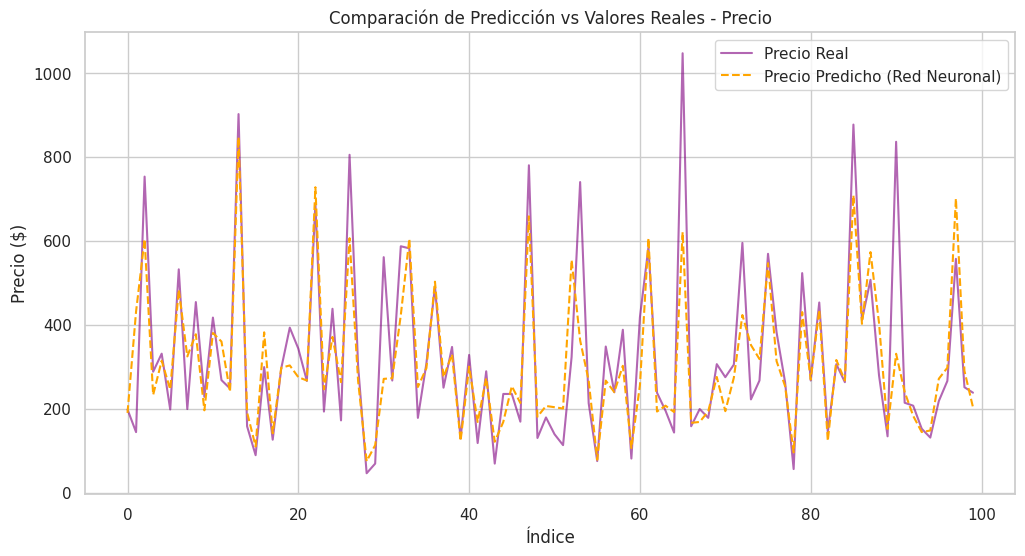

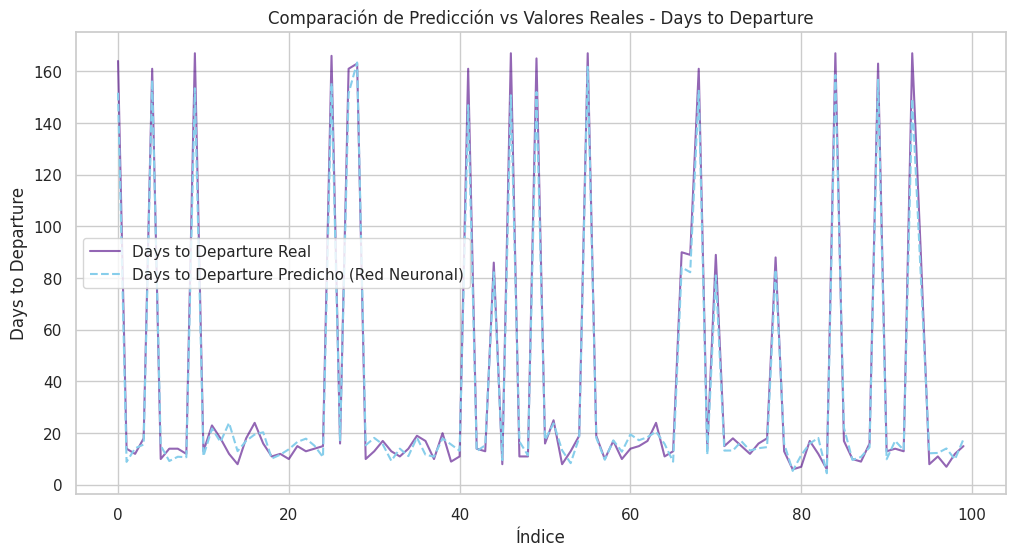

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Número de muestras
num_samples = 100
indices = np.random.choice(len(y_test_price), num_samples, replace=False)

# Obtener predicciones del modelo
y_pred_price, y_pred_days = model.predict(X_test)

# Asegurar que las predicciones tienen la forma adecuada
y_pred_price = y_pred_price.flatten()
y_pred_days = y_pred_days.flatten()

# Datos reales y predichos para Precio
y_real_price = y_test_price.iloc[indices].values
y_pred_price = y_pred_price[indices]

plt.figure(figsize=(12, 6))
plt.plot(range(num_samples), y_real_price, color="purple", label="Precio Real", alpha=0.6)
plt.plot(range(num_samples), y_pred_price, linestyle="dashed", color="orange", label="Precio Predicho (Red Neuronal)")
plt.xlabel("Índice")
plt.ylabel("Precio ($)")
plt.title("Comparación de Predicción vs Valores Reales - Precio")
plt.legend()
plt.grid(True)
plt.show()

# Datos reales y predichos para Days to Departure
y_real_days = y_test_days.iloc[indices].values
y_pred_days = y_pred_days[indices]

plt.figure(figsize=(12, 6))
plt.plot(range(num_samples), y_real_days, color="indigo", label="Days to Departure Real", alpha=0.6)
plt.plot(range(num_samples), y_pred_days, linestyle="dashed", color="skyblue", label="Days to Departure Predicho (Red Neuronal)")
plt.xlabel("Índice")
plt.ylabel("Days to Departure")
plt.title("Comparación de Predicción vs Valores Reales - Days to Departure")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Definir features y objetivo
X = df_filtrado[['Number Of Stops', 'Departure DayOfYear', 'Departure Airport', 'Arrival Airport', 'Airline']]
y_price = df_filtrado['Price']
y_days = df_filtrado['Days to Departure']

# OneHotEncoding para variables categóricas
cat_features = ['Departure Airport', 'Arrival Airport', 'Airline']
num_features = ['Number Of Stops', 'Departure DayOfYear']

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_cat = ohe.fit_transform(X[cat_features])

scaler = StandardScaler()
X_num = scaler.fit_transform(X[num_features])

X_prepared = np.hstack([X_num, X_cat])

# Dividir en train y test
X_train, X_test, y_train_price, y_test_price, y_train_days, y_test_days = train_test_split(
    X_prepared, y_price, y_days, test_size=0.2, random_state=42
)

# Definir la búsqueda de hiperparámetros
param_grid = {
    'max_depth': [3, 5, 7, 9, 12],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 300, 500, 700],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.3, 0.5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Instancia del modelo XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Configuración de RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,  # Número de combinaciones a probar
    scoring='neg_mean_absolute_error',
    cv=3,  # Validación cruzada en 3 folds
    verbose=2,
    n_jobs=-1  # Usa todos los núcleos disponibles
)

# Entrenar la búsqueda para predicción de precios
random_search.fit(X_train, y_train_price)

# Obtener los mejores parámetros
best_params_price = random_search.best_params_
print("Mejores hiperparámetros para Precio:", best_params_price)

# Entrenar la búsqueda para predicción de Days to Departure
random_search.fit(X_train, y_train_days)

# Obtener los mejores parámetros
best_params_days = random_search.best_params_
print("Mejores hiperparámetros para Days to Departure:", best_params_days)

# Entrenar modelos con los mejores parámetros encontrados
xgb_best_price = xgb.XGBRegressor(**best_params_price, objective='reg:squarederror', random_state=42)
xgb_best_days = xgb.XGBRegressor(**best_params_days, objective='reg:squarederror', random_state=42)

xgb_best_price.fit(X_train, y_train_price)
xgb_best_days.fit(X_train, y_train_days)

# Predicción
y_pred_price = xgb_best_price.predict(X_test)
y_pred_days = xgb_best_days.predict(X_test)

# Evaluación del modelo
mae_price = mean_absolute_error(y_test_price, y_pred_price)
r2_price = r2_score(y_test_price, y_pred_price)

mae_days = mean_absolute_error(y_test_days, y_pred_days)
r2_days = r2_score(y_test_days, y_pred_days)

print(f'MAE Precio: {mae_price:.2f}')
print(f'R² para Precio: {r2_price:.2f}')
print(f'MAE Days to Departure: {mae_days:.2f}')
print(f'R² para Days to Departure: {r2_days:.2f}')


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Mejores hiperparámetros para Precio: {'subsample': 1.0, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 12, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.6}
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Mejores hiperparámetros para Days to Departure: {'subsample': 1.0, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 1.0}
MAE Precio: 57.45
R² para Precio: 0.76
MAE Days to Departure: 1.73
R² para Days to Departure: 1.00


In [ ]:
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Definir features y objetivo
X = df_filtrado[['Number Of Stops', 'Departure DayOfYear', 'Departure Airport', 'Arrival Airport', 'Airline']]
y = df_filtrado[['Price', 'Days to Departure']]  # Ahora tenemos dos salidas

# OneHotEncoding para variables categóricas
cat_features = ['Departure Airport', 'Arrival Airport', 'Airline']
num_features = ['Number Of Stops', 'Departure DayOfYear']

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_cat = ohe.fit_transform(X[cat_features])

scaler = StandardScaler()
X_num = scaler.fit_transform(X[num_features])

X_prepared = np.hstack([X_num, X_cat])

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)

# Modelo Multioutput con XGBoost
xgb_regressor = xgb.XGBRegressor(
    max_depth=12,  # Se ajusta al mejor valor encontrado
    learning_rate=0.1,
    n_estimators=500,
    min_child_weight=7,
    gamma=0.1,
    subsample=1.0,
    colsample_bytree=0.6,
    objective='reg:squarederror',
    random_state=42
)

# Usamos MultiOutputRegressor para manejar ambas salidas
multioutput_model = MultiOutputRegressor(xgb_regressor)
multioutput_model.fit(X_train, y_train)

# Predicción
y_pred = multioutput_model.predict(X_test)

# Evaluación del modelo
mae_price = mean_absolute_error(y_test.iloc[:, 0], y_pred[:, 0])
r2_price = r2_score(y_test.iloc[:, 0], y_pred[:, 0])

mae_days = mean_absolute_error(y_test.iloc[:, 1], y_pred[:, 1])
r2_days = r2_score(y_test.iloc[:, 1], y_pred[:, 1])

print(f'MAE Precio: {mae_price:.2f}')
print(f'R² para Precio: {r2_price:.2f}')
print(f'MAE Days to Departure: {mae_days:.2f}')
print(f'R² para Days to Departure: {r2_days:.2f}')


MAE Precio: 57.55
R² para Precio: 0.76
MAE Days to Departure: 1.73
R² para Days to Departure: 1.00


In [ ]:
import lightgbm as lgb
from sklearn.multioutput import MultiOutputRegressor

# Modelo LightGBM ajustado
lgb_regressor = lgb.LGBMRegressor(
    boosting_type='gbdt',
    max_depth=12,
    learning_rate=0.1,
    n_estimators=500,
    min_child_weight=7,
    subsample=1.0,
    colsample_bytree=0.6,
    reg_alpha=0.1,
    reg_lambda=0.5,
    random_state=42
)

# MultiOutput para predecir Precio y Days to Departure
lgb_model = MultiOutputRegressor(lgb_regressor)
lgb_model.fit(X_train, y_train)

# Predicción y Evaluación
y_pred_lgb = lgb_model.predict(X_test)
mae_price_lgb = mean_absolute_error(y_test.iloc[:, 0], y_pred_lgb[:, 0])
r2_price_lgb = r2_score(y_test.iloc[:, 0], y_pred_lgb[:, 0])

print(f'LGBM - MAE Precio: {mae_price_lgb:.2f}')
print(f'LGBM - R² para Precio: {r2_price_lgb:.2f}')


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002950 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 133286, number of used features: 24
[LightGBM] [Info] Start training from score 308.004314


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 133286, number of used features: 24
[LightGBM] [Info] Start training from score 36.935117
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LGBM - MAE Precio: 59.80
LGBM - R² para Precio: 0.75


In [ ]:
import lightgbm as lgb
from sklearn.multioutput import MultiOutputRegressor

# Modelo LightGBM ajustado
lgb_regressor = lgb.LGBMRegressor(
    boosting_type='gbdt',
    max_depth=12,
    learning_rate=0.1,
    n_estimators=500,
    min_child_weight=7,
    subsample=1.0,
    colsample_bytree=0.6,
    reg_alpha=0.1,
    reg_lambda=0.5,
    random_state=42
)

# MultiOutput para predecir Precio y Days to Departure
lgb_model = MultiOutputRegressor(lgb_regressor)
lgb_model.fit(X_train, y_train)

# Predicción y Evaluación
y_pred_lgb = lgb_model.predict(X_test)
mae_price_lgb = mean_absolute_error(y_test.iloc[:, 0], y_pred_lgb[:, 0])
r2_price_lgb = r2_score(y_test.iloc[:, 0], y_pred_lgb[:, 0])

print(f'LGBM - MAE Precio: {mae_price_lgb:.2f}')
print(f'LGBM - R² para Precio: {r2_price_lgb:.2f}')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 133286, number of used features: 24
[LightGBM] [Info] Start training from score 308.004314


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001667 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 133286, number of used features: 24
[LightGBM] [Info] Start training from score 36.935117
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LGBM - MAE Precio: 59.80
LGBM - R² para Precio: 0.75


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.multioutput import MultiOutputRegressor

# Definir modelos base con MultiOutputRegressor
base_models = [
    ('xgb', MultiOutputRegressor(xgb.XGBRegressor(
        max_depth=12, learning_rate=0.1, n_estimators=500, min_child_weight=7,
        gamma=0.1, subsample=1.0, colsample_bytree=0.6, objective='reg:squarederror',
        random_state=42))),

    ('lgbm', MultiOutputRegressor(lgb.LGBMRegressor(
        max_depth=12, learning_rate=0.1, n_estimators=500, min_child_weight=7,
        subsample=1.0, colsample_bytree=0.6, reg_alpha=0.1, reg_lambda=0.5,
        random_state=42)))
]

# Modelo meta (Ridge para combinar predicciones)
meta_model = Ridge()

# Aplicar MultiOutputRegressor al StackingRegressor
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=Ridge()
)

# Asegurar que y_train sea una matriz 2D
y_train = y_train.reshape(-1, 2)
y_test = y_test.reshape(-1, 2)

# Ahora entrenar el modelo
stacking_model.fit(X_train, y_train)

# Predicción y Evaluación
y_pred_stack = stacking_model.predict(X_test)

mae_price_stack = mean_absolute_error(y_test.iloc[:, 0], y_pred_stack[:, 0])
r2_price_stack = r2_score(y_test.iloc[:, 0], y_pred_stack[:, 0])

mae_days_stack = mean_absolute_error(y_test.iloc[:, 1], y_pred_stack[:, 1])
r2_days_stack = r2_score(y_test.iloc[:, 1], y_pred_stack[:, 1])

print(f'Stacking (XGBoost + LGBM) - MAE Precio: {mae_price_stack:.2f}')
print(f'Stacking (XGBoost + LGBM) - R² para Precio: {r2_price_stack:.2f}')
print(f'Stacking (XGBoost + LGBM) - MAE Days to Departure: {mae_days_stack:.2f}')
print(f'Stacking (XGBoost + LGBM) - R² para Days to Departure: {r2_days_stack:.2f}')


TypeError: 'DataFrame' object is not callable

In [ ]:
# !pip install lightgbm
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Assuming df_filtrado is already defined from previous steps and contains your data
# Let's redefine X and y as in previous steps.
X = df_filtrado[['Number Of Stops', 'Departure DayOfYear', 'Departure Airport', 'Arrival Airport', 'Airline']]
y = df_filtrado[['Price', 'Days to Departure']]

# OneHotEncoding for categorical variables
cat_features = ['Departure Airport', 'Arrival Airport', 'Airline']
num_features = ['Number Of Stops', 'Departure DayOfYear']

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_cat = ohe.fit_transform(X[cat_features])

scaler = StandardScaler()
X_num = scaler.fit_transform(X[num_features])

X_prepared = np.hstack([X_num, X_cat])

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)

# Separate Price and Days to Departure for training and testing
y_train_price, y_train_days = y_train['Price'], y_train['Days to Departure']
y_test_price, y_test_days = y_test['Price'], y_test['Days to Departure']

# Define base models (for both Price and Days to Departure)
base_models = [
    ('xgb', xgb.XGBRegressor(
        max_depth=12, learning_rate=0.1, n_estimators=500, min_child_weight=7,
        gamma=0.1, subsample=1.0, colsample_bytree=0.6, objective='reg:squarederror',
        random_state=42)),
    ('lgbm', lgb.LGBMRegressor(
        max_depth=12, learning_rate=0.1, n_estimators=500, min_child_weight=7,
        subsample=1.0, colsample_bytree=0.6, reg_alpha=0.1, reg_lambda=0.5,
        random_state=42))
]

# Stacking Regressor for Price
stacking_model_price = StackingRegressor(
    estimators=base_models,
    final_estimator=Ridge()
)

# Stacking Regressor for Days to Departure
stacking_model_days = StackingRegressor(
    estimators=base_models,
    final_estimator=Ridge()
)

# Train each Stacking Regressor
stacking_model_price.fit(X_train, y_train_price)
stacking_model_days.fit(X_train, y_train_days)

# Predict with each Stacking Regressor
y_pred_price = stacking_model_price.predict(X_test)
y_pred_days = stacking_model_days.predict(X_test)

# Evaluate Price model
mae_price_stack = mean_absolute_error(y_test_price, y_pred_price)
r2_price_stack = r2_score(y_test_price, y_pred_price)

# Evaluate Days to Departure model
mae_days_stack = mean_absolute_error(y_test_days, y_pred_days)
r2_days_stack = r2_score(y_test_days, y_pred_days)

print(f'Stacking (XGBoost + LGBM) - MAE Precio: {mae_price_stack:.2f}')
print(f'Stacking (XGBoost + LGBM) - R² para Precio: {r2_price_stack:.2f}')
print(f'Stacking (XGBoost + LGBM) - MAE Days to Departure: {mae_days_stack:.2f}')
print(f'Stacking (XGBoost + LGBM) - R² para Days to Departure: {r2_days_stack:.2f}')

In [ ]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Definir features y objetivo
X = df_filtrado[['Number Of Stops', 'Departure DayOfYear', 'Departure Airport', 'Arrival Airport', 'Airline']]
y = df_filtrado[['Price', 'Days to Departure']]

# OneHotEncoding para variables categóricas
cat_features = ['Departure Airport', 'Arrival Airport', 'Airline']
num_features = ['Number Of Stops', 'Departure DayOfYear']

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_cat = ohe.fit_transform(X[cat_features])

scaler = StandardScaler()
X_num = scaler.fit_transform(X[num_features])

X_prepared = np.hstack([X_num, X_cat])

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)

# Modelos base
xgb_model = MultiOutputRegressor(xgb.XGBRegressor(
    max_depth=12, learning_rate=0.1, n_estimators=500, min_child_weight=7,
    gamma=0.1, subsample=1.0, colsample_bytree=0.6, objective='reg:squarederror',
    random_state=42))

lgbm_model = MultiOutputRegressor(lgb.LGBMRegressor(
    max_depth=12, learning_rate=0.1, n_estimators=500, min_child_weight=7,
    subsample=1.0, colsample_bytree=0.6, reg_alpha=0.1, reg_lambda=0.5,
    random_state=42))

# Entrenar modelos
xgb_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)

# Obtener predicciones
y_pred_xgb = xgb_model.predict(X_test)
y_pred_lgbm = lgbm_model.predict(X_test)

# Promediar predicciones
y_pred_stack = (y_pred_xgb + y_pred_lgbm) / 2

# Evaluación del modelo
mae_price_stack = mean_absolute_error(y_test.iloc[:, 0], y_pred_stack[:, 0])
r2_price_stack = r2_score(y_test.iloc[:, 0], y_pred_stack[:, 0])

mae_days_stack = mean_absolute_error(y_test.iloc[:, 1], y_pred_stack[:, 1])
r2_days_stack = r2_score(y_test.iloc[:, 1], y_pred_stack[:, 1])

print(f'Stacking (XGBoost + LGBM) - MAE Precio: {mae_price_stack:.2f}')
print(f'Stacking (XGBoost + LGBM) - R² para Precio: {r2_price_stack:.2f}')
print(f'Stacking (XGBoost + LGBM) - MAE Days to Departure: {mae_days_stack:.2f}')
print(f'Stacking (XGBoost + LGBM) - R² para Days to Departure: {r2_days_stack:.2f}')


In [ ]:
df_filtrado["Month"].unique()

In [ ]:
df_filtrado.columns

In [ ]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Definir features y objetivo
X = df_filtrado[['Number Of Stops', 'Departure Airport', 'Arrival Airport', 'Airline', 'Cabin', 'Route', 'Month', 'Departure Day']]
y = df_filtrado[['Price', 'Days to Departure']]  # Salidas

# OneHotEncoding para variables categóricas
cat_features = ['Departure Airport', 'Arrival Airport', 'Airline', 'Cabin', 'Route', 'Departure Day']
num_features = ['Number Of Stops', 'Month']

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_cat = ohe.fit_transform(X[cat_features])

scaler = StandardScaler()
X_num = scaler.fit_transform(X[num_features])

X_prepared = np.hstack([X_num, X_cat])

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)



In [ ]:
# Definir modelos base con MultiOutputRegressor
base_models = [
    ('xgb', xgb.XGBRegressor(
        max_depth=12, learning_rate=0.1, n_estimators=500, min_child_weight=7,
        gamma=0.1, subsample=1.0, colsample_bytree=0.6, objective='reg:squarederror',
        random_state=42)),

    ('lgbm', lgb.LGBMRegressor(
        max_depth=12, learning_rate=0.1, n_estimators=500, min_child_weight=7,
        subsample=1.0, colsample_bytree=0.6, reg_alpha=0.1, reg_lambda=0.5,
        random_state=42))
]

# Modelo meta (Ridge para combinar predicciones)
meta_model = Ridge()

# Aplicar MultiOutputRegressor al StackingRegressor
stacking_model = MultiOutputRegressor(
    StackingRegressor(estimators=base_models, final_estimator=meta_model)
)

# Ahora entrenar el modelo
stacking_model.fit(X_train, y_train)

# Predicción y Evaluación
y_pred_stack = stacking_model.predict(X_test)

mae_price_stack = mean_absolute_error(y_test.iloc[:, 0], y_pred_stack[:, 0])
r2_price_stack = r2_score(y_test.iloc[:, 0], y_pred_stack[:, 0])

mae_days_stack = mean_absolute_error(y_test.iloc[:, 1], y_pred_stack[:, 1])
r2_days_stack = r2_score(y_test.iloc[:, 1], y_pred_stack[:, 1])

print(f'Stacking (XGBoost + LGBM) - MAE Precio: {mae_price_stack:.2f}')
print(f'Stacking (XGBoost + LGBM) - R² para Precio: {r2_price_stack:.2f}')
print(f'Stacking (XGBoost + LGBM) - MAE Days to Departure: {mae_days_stack:.2f}')
print(f'Stacking (XGBoost + LGBM) - R² para Days to Departure: {r2_days_stack:.2f}')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002514 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 313
[LightGBM] [Info] Number of data points in the train set: 90730, number of used features: 154
[LightGBM] [Info] Start training from score 310.126044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000613 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 291
[LightGBM] [Info] Number of data points in the train set: 72584, number of used features: 143
[LightGBM] [Info] Start training from score 310.640596
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 72584, number of used features: 144
[LightGBM] [Info] Start training from score 308.945374
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000850 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 72584, number of used features: 144
[LightGBM] [Info] Start training from score 309.402265
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 291
[LightGBM] [Info] Number of data points in the train set: 72584, number of used features: 143
[LightGBM] [Info] Start training from score 310.996873
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000635 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 72584, number of used features: 144
[LightGBM] [Info] Start training from score 310.645115
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 313
[LightGBM] [Info] Number of data points in the train set: 90730, number of used features: 154
[LightGBM] [Info] Start training from score 35.388813
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000936 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 291
[LightGBM] [Info] Number of data points in the train set: 72584, number of used features: 143
[LightGBM] [Info] Start training from score 35.424543
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000620 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 72584, number of used features: 144
[LightGBM] [Info] Start training from score 35.468161
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 72584, number of used features: 144
[LightGBM] [Info] Start training from score 35.459330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 291
[LightGBM] [Info] Number of data points in the train set: 72584, number of used features: 143
[LightGBM] [Info] Start training from score 35.303896
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000805 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 72584, number of used features: 144
[LightGBM] [Info] Start training from score 35.288135
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Stacking (XGBoost + LGBM) - MAE Precio: 38.67
Stacking (XGBoost + LGBM) - R² para Precio: 0.91
Stacking (XGBoost + LGBM) - MAE Days to Departure: 2.62
Stacking (XGBoost + LGBM) - R² para Days to Departure: 0.99


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
print(type(y_test))
print(type(y_pred_stack))


<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


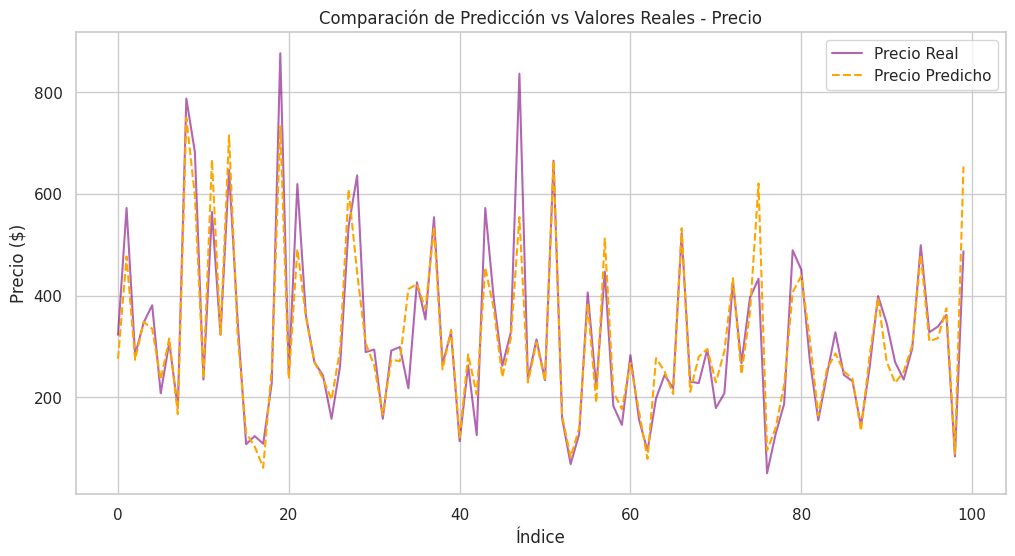

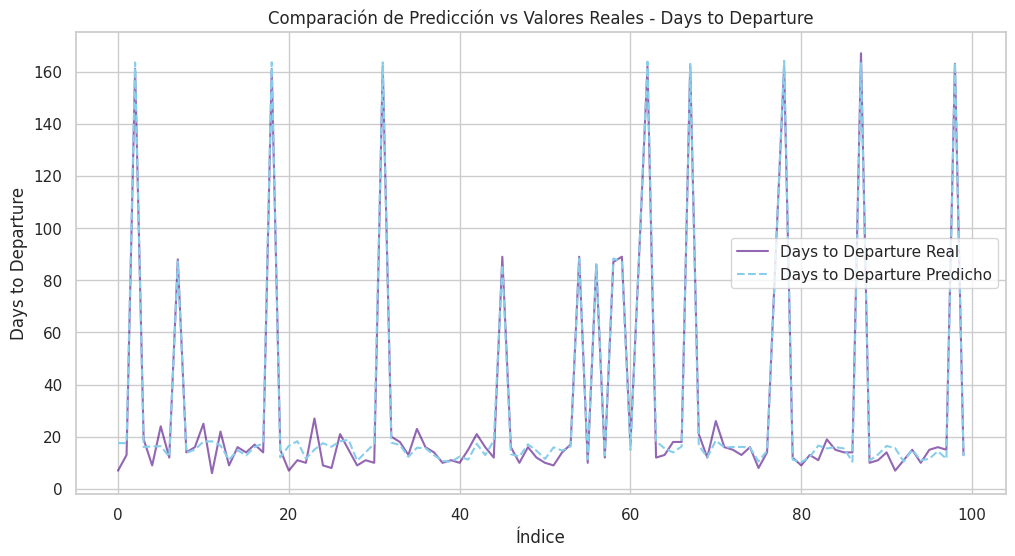

In [ ]:
import matplotlib.pyplot as plt

# Número de muestras
num_samples = 100
indices = np.random.choice(len(y_test), num_samples, replace=False)

# Datos reales y predichos para Precio
y_real_price = y_test.iloc[indices, 0].values
y_pred_price = y_pred_stack[indices, 0]

plt.figure(figsize=(12, 6))
plt.plot(range(num_samples), y_real_price, color="purple", label="Precio Real", alpha=0.6)
plt.plot(range(num_samples), y_pred_price, linestyle="dashed", color="orange", label="Precio Predicho")
plt.xlabel("Índice")
plt.ylabel("Precio ($)")
plt.title("Comparación de Predicción vs Valores Reales - Precio")
plt.legend()
plt.grid(True)
plt.show()

# Datos reales y predichos para Days to Departure
y_real_days = y_test.iloc[indices, 1].values
y_pred_days = y_pred_stack[indices, 1]

plt.figure(figsize=(12, 6))
plt.plot(range(num_samples), y_real_days, color="indigo", label="Days to Departure Real", alpha=0.6)
plt.plot(range(num_samples), y_pred_days, linestyle="dashed", color="skyblue", label="Days to Departure Predicho")
plt.xlabel("Índice")
plt.ylabel("Days to Departure")
plt.title("Comparación de Predicción vs Valores Reales - Days to Departure")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Predicción en entrenamiento
y_train_pred = stacking_model.predict(X_train)

# Evaluación en conjunto de entrenamiento
mae_price_train = mean_absolute_error(y_train.iloc[:, 0], y_train_pred[:, 0])
r2_price_train = r2_score(y_train.iloc[:, 0], y_train_pred[:, 0])

mae_days_train = mean_absolute_error(y_train.iloc[:, 1], y_train_pred[:, 1])
r2_days_train = r2_score(y_train.iloc[:, 1], y_train_pred[:, 1])

print("\n--- Evaluación en Entrenamiento ---")
print(f"MAE Precio (Train): {mae_price_train:.2f}")
print(f"R² Precio (Train): {r2_price_train:.2f}")
print(f"MAE Days to Departure (Train): {mae_days_train:.2f}")
print(f"R² Days to Departure (Train): {r2_days_train:.2f}")

# Comparar con prueba
print("\n--- Evaluación en Prueba ---")
print(f"MAE Precio (Test): {mae_price_stack:.2f}")
print(f"R² Precio (Test): {r2_price_stack:.2f}")
print(f"MAE Days to Departure (Test): {mae_days_stack:.2f}")
print(f"R² Days to Departure (Test): {r2_days_stack:.2f}")

# Comprobación de overfitting
if (r2_price_train - r2_price_stack) > 0.05 or (r2_days_train - r2_days_stack) > 0.05:
    print("\n El modelo muestra signos de overfitting. Considera ajustar hiperparámetros.")
else:
    print("\n No hay signos evidentes de overfitting.")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



--- Evaluación en Entrenamiento ---
MAE Precio (Train): 37.44
R² Precio (Train): 0.91
MAE Days to Departure (Train): 2.74
R² Days to Departure (Train): 0.99

--- Evaluación en Prueba ---
MAE Precio (Test): 38.93
R² Precio (Test): 0.90
MAE Days to Departure (Test): 2.80
R² Days to Departure (Test): 0.99

 No hay signos evidentes de overfitting.
